# Modelo de regresión lineal multivariada

## 1. Exploración inicial

### 1.1 Importación de librerías necesarias para el análisis

<div style="text-align:justify; line-height: 1.9; "> 

- **Pandas** 
es una biblioteca utilizada para facilitar la manipulación y el análisis de datos.

- **Numpy** 
es una librería especializada en el cálculo numérico y el análisis de datos, especialmente para un gran volumen de datos.

- **Matplotlib** 
es una biblioteca para crear visualizaciones estáticas, animadas e interactivas en Python.

- **Seaborn** 
es una biblioteca de visualización de datos de Python basada en matplotlib. Proporciona una interfaz de alto nivel para crear gráficos estadísticos atractivos e informativos.
</div>

In [84]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### 1.2 Lectura del archivo CSV

In [85]:
#Lectura de la base de datos
data = pd.read_csv('../../data/Life_Expectancy_Data.csv')


In [86]:
#Quitando los espacios para evitar errores en búsquedas posteriores
data.columns = data.columns.str.strip()

In [87]:
#Visualizar los primeros registros del dataset
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [88]:
#Visualizar los últimos registros del dataset
data.tail()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.0,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.0,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.0,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.0,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.0,79.0,1483,...,78.0,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8


<div style="text-align:justify; line-height: 1.9; "> 
Observaciones: hay 2938 registros en total
</div>

In [89]:
#Visualizar el nombre de las columnas
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [90]:
#Visualizar el tipo de dato de las columnas
data.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
BMI                                float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
HIV/AIDS                           float64
GDP                                float64
Population                         float64
thinness  1-19 years               float64
thinness 5-9 years                 float64
Income composition of resources    float64
Schooling                          float64
dtype: object

### 1.3 Análisis exploratorio de los datos

<div style="text-align:justify; line-height: 1.9; "> 
Se utilizará el método info() para identificar valores faltantes, comprender el tipo de dato de cada una de nuestras variables y empezar a planear la limpieza y el preprocesamiento de los datos.
</div>

In [91]:
#Información relevante sobre cada una de las columnas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

<div style="text-align:justify; line-height: 1.9; ">

En esta etapa se realiza un análisis estadístico descriptivo del dataset utilizando el método describe(). Este procedimiento proporciona una visión general de las variables numéricas, incluyendo métricas como la media, desviación estándar, valores mínimo y máximo, así como los percentiles. Estos indicadores permiten identificar distribuciones sesgadas, posibles anomalías o valores atípicos. Además, el conteo de valores por columna puede servir como una primera aproximación para detectar la presencia de valores nulos, ya que cualquier discrepancia con el total de registros podría indicar datos faltantes.

</div>

In [92]:
#Análisis descriptivo de la base de datos
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


<div style="text-align:justify; line-height: 1.9; "> 

#### Observaciones:

- **Esperanza de vida**
El promedio de esperanza de vida mundial es de 69.22 años.

- **Mortalidad adulta**
Alta variavilidad en la mortalidad adulta ya que tiene un mínimo valor de 1 y un máximo valor de 723.

- **Muertes infantiles**
Muertes infantiles con valores extremos: Aunque la mediana de muertes infantiles es 3, hay países con hasta 1800 muertes infantiles registradas, lo que indica la presencia de outliers.

- **Consumo de alcohol**
El promedio de consumo de alcohol es de 4.6 litros per cápita, pero hay países donde casi no se consume (0.01) y otros donde el consumo es muy alto (hasta 17.87), probablemente por diferencias culturales o socioeconómicas.

- **Hepatitis B**
La vacunación contra Hepatitis B es bastante completa, aunque hay valores bajos, el 75% de los países tienen una cobertura de al menos 97%, lo que indica un alto nivel de inmunización global.

- **Sarampión**
Altísima varianza en casos de sarampión (Measles), el promedio es de más de 2400 casos, pero el valor máximo supera los 212,000, lo que muestra que algunos países aún tienen brotes importantes, mientras que otros no registran ninguno.

- **Gasto en salud como porcentaje del Producto Interno Bruto**
Con una desviación de 1987.91, es evidente que los valores están muy dispersos.

- **Mortalidad por VIH/SIDA por cada 1,000 habitantes**
Va de 0.1% a 50.6%, con media de 1.74%. Tiene una distribución sesgada, con muchos países cercanos a 0 y pocos con cifras muy altas.

</div>




#### Registros duplicados

<div style="text-align:justify; line-height: 1.9; "> 

No se presentan registros duplicados en el dataset:

</div>

In [93]:
#Presentar la suma de registros duplicados
data.duplicated().sum()

np.int64(0)

#### Valores nulos

<div style="text-align:justify; line-height: 1.9; "> 

En esta etapa del análisis exploratorio, se realizó un diagnóstico de valores nulos presentes en el dataset. Se observó que varias columnas contienen datos faltantes, siendo las más afectadas: Population con 652 valores nulos, GDP con 448 y Hepatitis B con 553. Otras columnas como BMI, Alcohol, Polio, Diphtheria y thinness también presentan datos ausentes en menor proporción.

</div>

In [94]:
#Visualizar cuantos valores nulos hay por columna
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [95]:
#Porcentaje de valores nulos
porcentaje_nulos = (data.isnull().sum() / len(data)) * 100
#Porcentaje de nulos mayores a 0
porcentaje_nulos = porcentaje_nulos[porcentaje_nulos > 0]
#Imprimirlos de mayor a menor
print(porcentaje_nulos.sort_values(ascending=False))

Population                         22.191967
Hepatitis B                        18.822328
GDP                                15.248468
Total expenditure                   7.692308
Alcohol                             6.603131
Income composition of resources     5.684139
Schooling                           5.547992
thinness 5-9 years                  1.157250
thinness  1-19 years                1.157250
BMI                                 1.157250
Polio                               0.646698
Diphtheria                          0.646698
Life expectancy                     0.340368
Adult Mortality                     0.340368
dtype: float64


<div style="text-align:justify; line-height: 1.9; "> 

Esta información es crucial para decidir estrategias adecuadas de imputación o limpieza, especialmente en las variables con mayor proporción de datos faltantes, ya que podrían afectar el análisis y rendimiento de los modelos predictivos si no se tratan correctamente.

</div>

<Axes: >

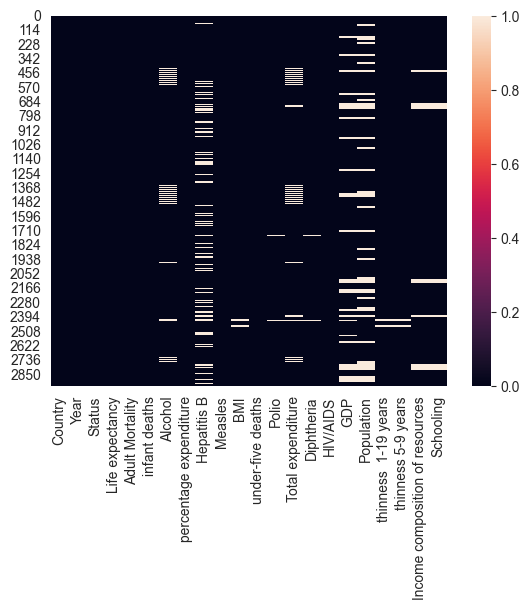

In [96]:
#Creando visualización de valores nulos
sns.heatmap(data.isnull())

<div style="text-align:justify; line-height: 1.9; "> 

Los valores nulos no están distribuidos uniformemente. Algunas filas tienen múltiples columnas con nulos.  Para minimizar la pérdida de información, pero asegurar la calidad del modelo predictivo, prestaremos más atención a estas columnas al evaluar el nivel de correlación con la esperanza de vida para ver si son importantes en nuestro modelo y aplicar técnicas de imputación o descartar esos registros.

</div>

#### Datos categóricos inválidos

<div style="text-align:justify; line-height: 1.9; "> 

Según la descripción del dataset, los datos fueron recolectados a partir de diversas fuentes confiables, incluyendo organismos internacionales como las Naciones Unidas. Esto explica por qué el atributo Country contiene exactamente 193 valores únicos, correspondientes a los 193 países miembros de la ONU.

En cuanto a la variable Status, se identifican dos categorías claras: Developing (2,426 registros) y Developed (512 registros). Ambas aparecen de forma consistente, sin variaciones en mayúsculas, minúsculas o tiempos verbales, lo que garantiza la integridad de esta columna categórica.

</div>

In [97]:
#Recorrer en las columnas con variables que tienen tipo de dato object es decir, texto o categorías
for i in data.select_dtypes(include='object').columns:
    #Imprimir conteo de frecuencia de los valores únicos de esa columna
    print(data[i].value_counts())

Country
Afghanistan              16
Albania                  16
Algeria                  16
Angola                   16
Antigua and Barbuda      16
                         ..
Monaco                    1
Marshall Islands          1
Saint Kitts and Nevis     1
San Marino                1
Tuvalu                    1
Name: count, Length: 193, dtype: int64
Status
Developing    2426
Developed      512
Name: count, dtype: int64


#### Valores negativos en columnas numéricas que no deberían tenerlos (edad, año, población...)

<div style="text-align:justify; line-height: 1.9; "> 

Como se puede observar a continuación, no existen valores negativos en las columnas numéricas que no deberían tenerlos

</div>

In [98]:
#Recorrer todas las columnas numéricas
for i in data.select_dtypes(include='number').columns:
    #Devuelve true si al menos un valor es negativo en la columna
    if(data[i]<0).any():
        #Imprime los valores negativos
        print(f"valores negativos en: {i}")
    else:
        print(f"No hay valores negativos en la columna {i}")

No hay valores negativos en la columna Year
No hay valores negativos en la columna Life expectancy
No hay valores negativos en la columna Adult Mortality
No hay valores negativos en la columna infant deaths
No hay valores negativos en la columna Alcohol
No hay valores negativos en la columna percentage expenditure
No hay valores negativos en la columna Hepatitis B
No hay valores negativos en la columna Measles
No hay valores negativos en la columna BMI
No hay valores negativos en la columna under-five deaths
No hay valores negativos en la columna Polio
No hay valores negativos en la columna Total expenditure
No hay valores negativos en la columna Diphtheria
No hay valores negativos en la columna HIV/AIDS
No hay valores negativos en la columna GDP
No hay valores negativos en la columna Population
No hay valores negativos en la columna thinness  1-19 years
No hay valores negativos en la columna thinness 5-9 years
No hay valores negativos en la columna Income composition of resources
No h

#### Registros duplicados

<div style="text-align:justify; line-height: 1.9; "> 

La presencia de datos duplicados puede afectar negativamente el análisis, ya que altera las estadísticas descriptivas, distorsiona los resultados y disminuye el rendimiento de los modelos de machine learning. Estos duplicados suelen originarse por errores en la entrada de datos, fusiones entre múltiples fuentes o importaciones desde distintos sistemas. Si no se detectan y eliminan, pueden generar conclusiones erróneas al asignar un peso excesivo a ciertos registros.

Para identificar filas duplicadas, utilizaremos el método df.duplicated(), el cual retorna una Serie booleana donde True indica que la fila está duplicada y False indica que la fila no está duplicada. Posteriormente, aplicamos el método .sum() el cual suma los valores True de la serie que equivalen a 1 y devuelve el conteo total de filas duplicadas.

Como se observa a continuación, en nuestro caso el resultado indica que no se encontraron registros duplicados en el dataset. Por lo tanto, no será necesario aplicar técnicas de manejo de duplicados durante la etapa de preprocesamiento de los datos.

</div>

In [99]:
# Muestra la suma de los registros duplicados
data.duplicated().sum()

np.int64(0)

#### Valores extremos

<div style="text-align:justify; line-height: 1.9; "> 

La detección de valores extremos o outliers es esencial durante el preprocesamiento, ya que estos pueden distorsionar las métricas estadísticas, afectar la distribución de los datos y comprometer el rendimiento de los modelos de aprendizaje automático.

En esta sección se realiza un análisis gráfico de los valores extremos (outliers) presentes en las variables numéricas del conjunto de datos, los cuales permiten visualizar la distribución de los datos y detectar posibles valores atípicos de forma clara.

</div>

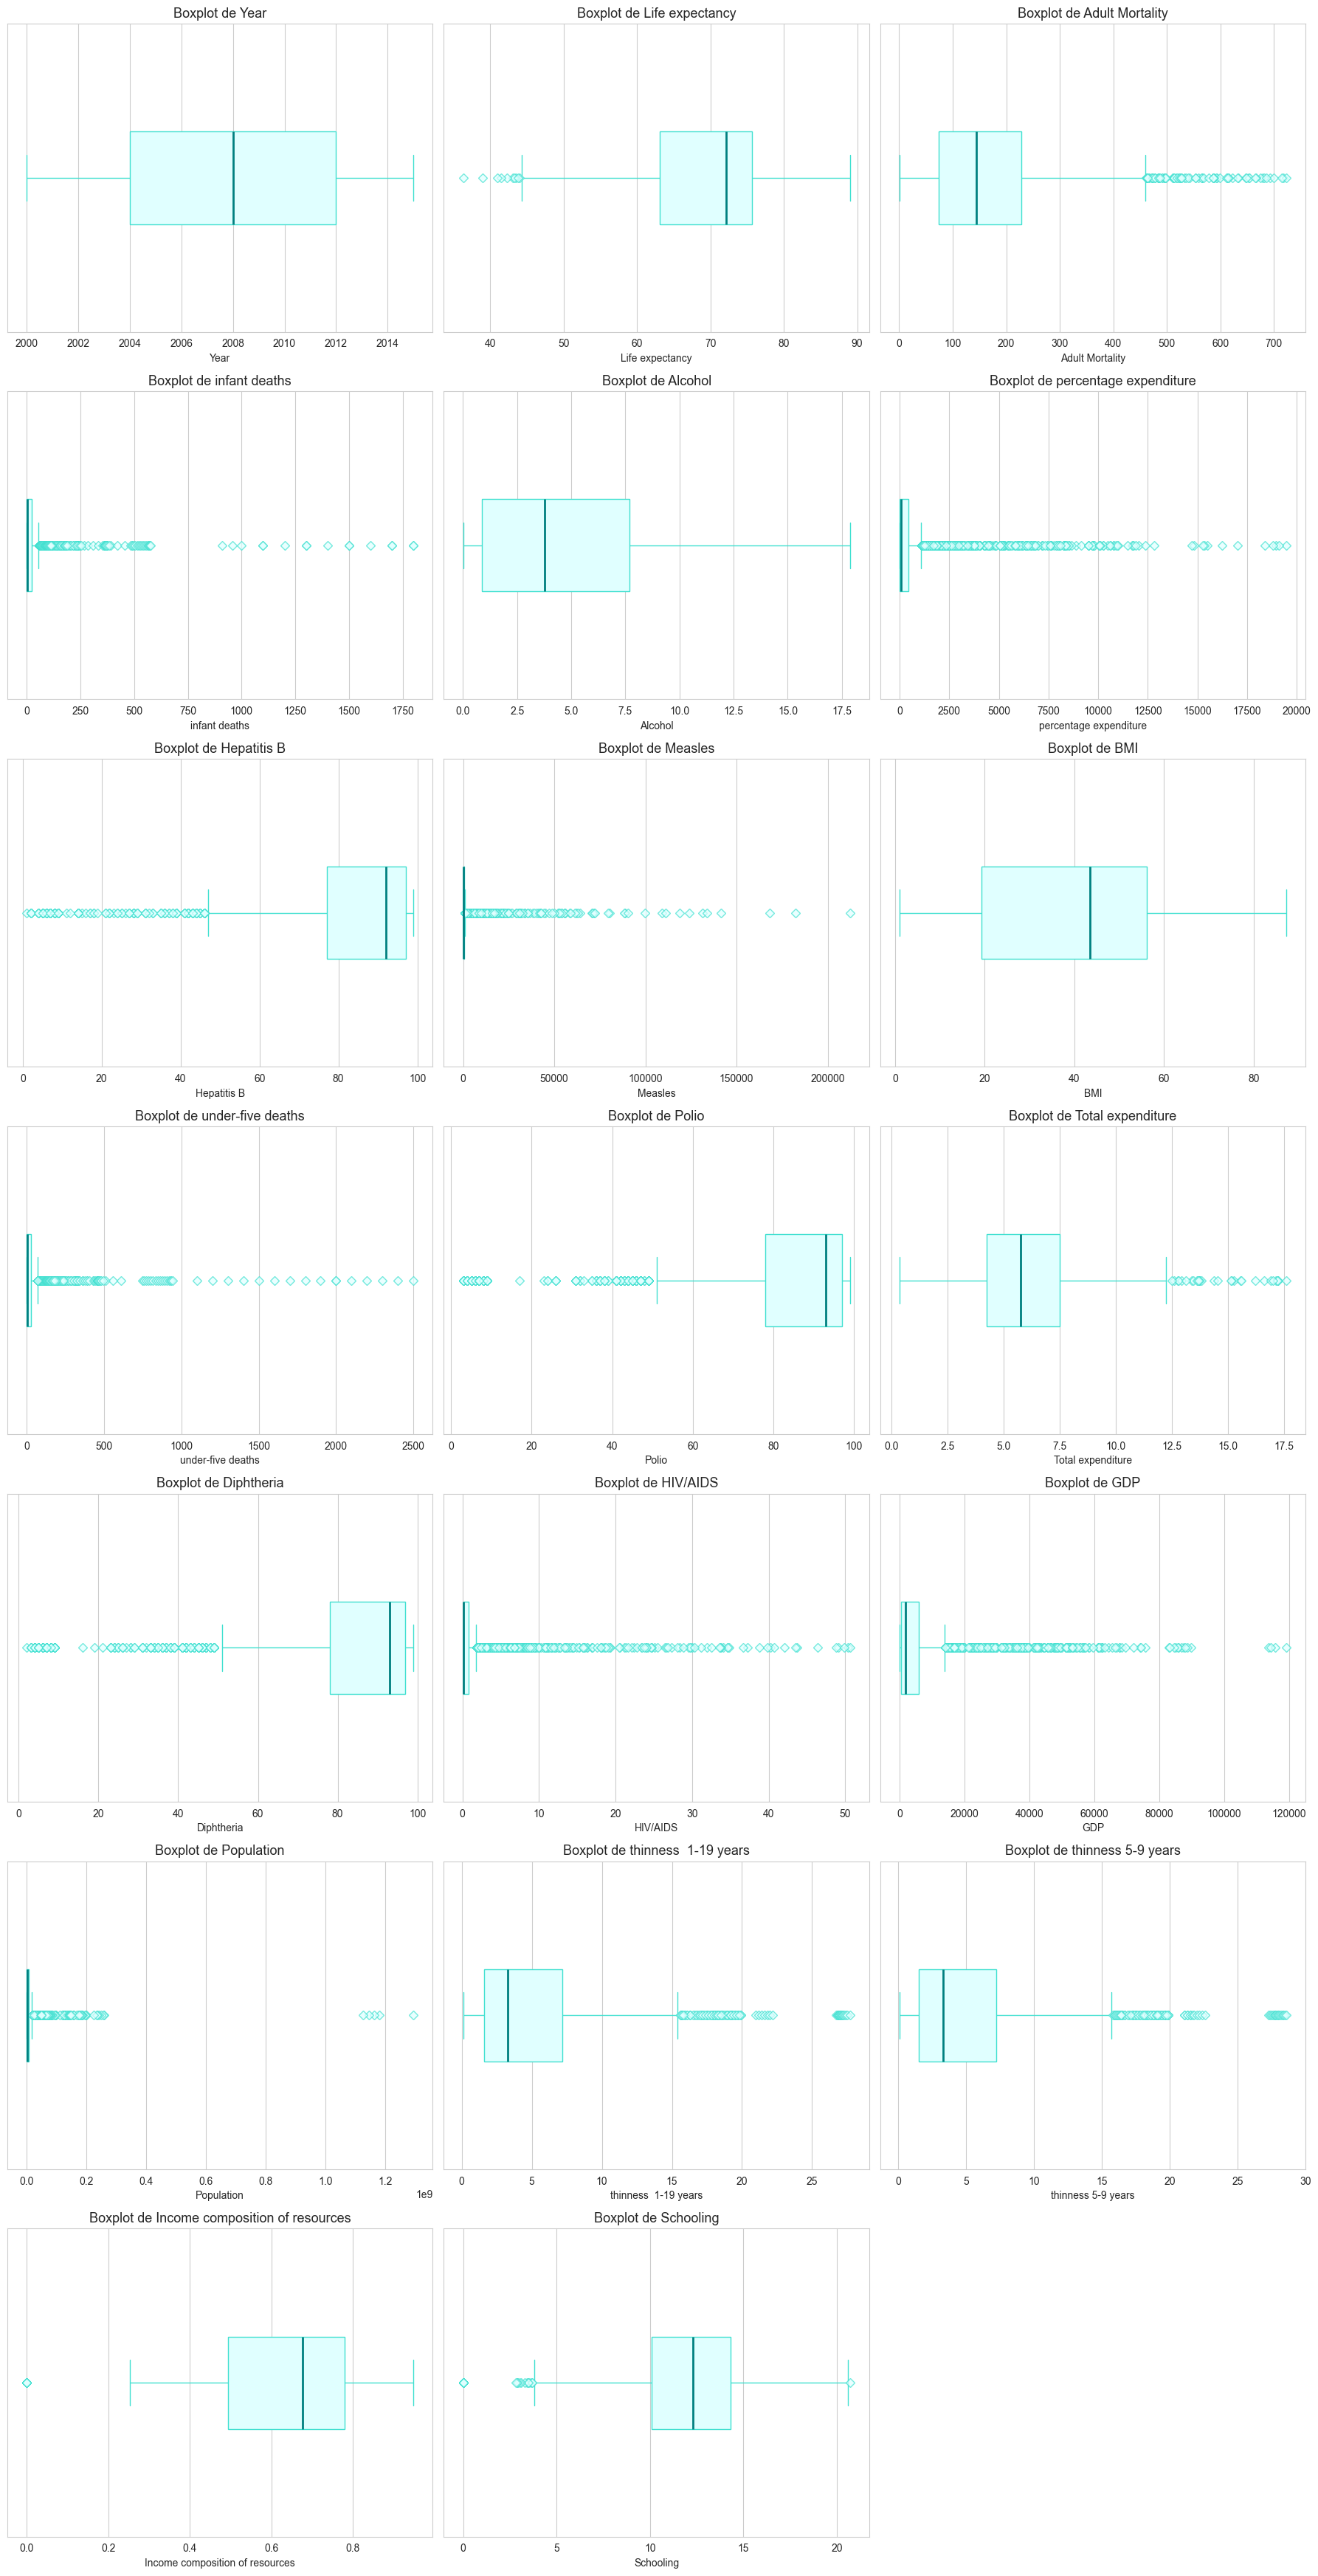

In [100]:
import math

sns.set_style("whitegrid")

# Filtrar solo columnas numéricas
numeric_columns = data.select_dtypes(include='number').columns
num_plots = len(numeric_columns)

# Configurar el número de columnas y filas
cols = 3
rows = math.ceil(num_plots / cols)

# Crear los subplots
fig, axes = plt.subplots(rows, cols, figsize=(18, 5 * rows))
axes = axes.flatten()  # Para iterar fácilmente

for i, column in enumerate(numeric_columns):
    sns.boxplot(
        x=data[column].dropna(),
        ax=axes[i],
        width=0.3,
        boxprops=dict(facecolor='lightcyan', edgecolor='turquoise'),
        medianprops=dict(color='teal', linewidth=2),
        whiskerprops=dict(color='turquoise'),
        capprops=dict(color='turquoise'),
        flierprops=dict(marker='D', markerfacecolor='lightcyan', markeredgecolor='turquoise', alpha=0.7)
    )
    axes[i].set_title(f'Boxplot de {column}', fontsize=13)
    axes[i].set_xlabel(column)

# Eliminar ejes vacíos si hay más subplots que columnas
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

<div style="text-align:justify; line-height: 1.9; "> 

Para identificar la cantidad de outliers en las variables numéricas del conjunto de datos y sus valores exactos, se utilizó el método del **rango intercuartílico (IQR)**. Este enfoque se basa en calcular el primer cuartil y el tercer cuartil de cada variable, y a partir de estos obtener el IQR como:

$$
\text{IQR} = Q_3 - Q_1
$$

Luego, se establecen los límites inferior y superior para detectar valores extremos utilizando las siguientes fórmulas:

$$
\text{Límite inferior} = Q_1 - 1.5 \times \text{IQR}
$$

$$
\text{Límite superior} = Q_3 + 1.5 \times \text{IQR}
$$

</div>


In [101]:
#Seleccionar solo las columnas numéricas de nuestro dataset, .columns obtiene solo los nombres de esas columnas.
numeric_columns = data.select_dtypes(include='number').columns

#Diccionario para guardar outliers por columna, la clave es el nombre de la columna, y el valor la lista de outliers.
outliers_dict = {}

#Iterar sobre cada nombre de columna de las columnas numéricas
for column in numeric_columns:
    #Extrae la columna como una Serie de pandas
    data_outliers = data[column]
    #Con el método quantile calculamos el primer cuartil
    Q1 = data_outliers.quantile(0.25)
    #Calculamos el tercer cuartil
    Q3 = data_outliers.quantile(0.75)
    #Calulamos el rango intercuartílico
    IQR = Q3 - Q1
    #Caluclamos el límite inferior
    lower_bound = Q1-1.5*IQR
    #Calculamos el límite superior
    upper_bound = Q3+1.5*IQR
    #Filtrar los valores que se encuentran fuera del intervalo, estos son los considerados outliers
    outliers = data_outliers[(data_outliers<lower_bound)|(data_outliers>upper_bound)]

    #Verifica si hay outliers
    if not outliers.empty:
        #Guarda cada clave (nombre de la columna) con su valor (lista de outliers)
        outliers_dict[column] = outliers.to_list()

#Recorrer el diccionario para imprimir los outliers
for column_name, values in outliers_dict.items():
    print(f"{column_name} → {len(values)} outliers: {values[:10]}{'...' if len(values) > 10 else ''}")




Life expectancy → 10 outliers: [36.3, 44.0, 43.5, 43.1, 43.3, 42.3, 41.5, 41.0, 39.0, 43.8]
Adult Mortality → 82 outliers: [491.0, 566.0, 652.0, 693.0, 699.0, 679.0, 647.0, 466.0, 472.0, 473.0]...
infant deaths → 315 outliers: [62, 64, 66, 69, 71, 74, 77, 80, 82, 84]...
percentage expenditure → 389 outliers: [2422.999774, 1991.430372, 2156.229842, 1810.875316, 1983.956937, 1455.608186, 1158.065259, 1127.74347, 1133.558003, 1504.329462]...
Hepatitis B → 254 outliers: [9.0, 8.0, 9.0, 44.0, 33.0, 8.0, 5.0, 5.0, 9.0, 21.0]...
Measles → 542 outliers: [1154, 2787, 3013, 1989, 2861, 1599, 1141, 1990, 1296, 2486]...
under-five deaths → 394 outliers: [83, 86, 89, 93, 97, 102, 106, 110, 113, 116]...
Polio → 279 outliers: [6.0, 5.0, 41.0, 36.0, 35.0, 24.0, 7.0, 36.0, 39.0, 4.0]...
Total expenditure → 32 outliers: [13.66, 14.39, 12.6, 13.73, 17.24, 13.71, 13.38, 12.77, 13.76, 13.83]...
Diphtheria → 298 outliers: [5.0, 41.0, 36.0, 33.0, 24.0, 6.0, 34.0, 38.0, 4.0, 4.0]...
HIV/AIDS → 542 outliers: [

<div style="text-align:justify; line-height: 1.9; "> 

#### Justificación para Conservar los Outliers

A continuación se presenta una lista detallada que explica por qué se decidió **mantener los outliers** en las siguientes variables. Estas observaciones extremas reflejan situaciones reales y significativas desde el punto de vista sanitario, económico o social:



1. **Life Expectancy (Esperanza de vida)**
Valores bajos como 36 o 39 años pueden representar países con conflictos bélicos, hambrunas o crisis sanitarias severas.  

2. **Adult Mortality (Mortalidad adulta)**
Altas tasas de mortalidad pueden ser reales en regiones con alta prevalencia de enfermedades infecciosas o sistemas de salud colapsados.  

3. **Infant Deaths (Muertes infantiles)**
Valores extremos (>300) se presentan en países con muy baja cobertura de salud neonatal. Ejemplo: Afganistán, Somalia, Chad.

4. **Percentage Expenditure (Gasto en salud como % del PIB)**
Algunos países pequeños o dependientes de ayuda internacional invierten una gran proporción de su PIB en salud.  

5. **Hepatitis B**
Altas tasas de infección pueden deberse a bajas tasas de vacunación en regiones endémicas.Ejemplo: Mongolia y algunos países africanos han reportado prevalencias > 8%.

6. **Measles (Sarampión)**
Outliers reflejan brotes reales antes de campañas de vacunación masiva. Ejemplo: Pakistán o República Democrática del Congo.

7. **Under-five Deaths (Muertes menores de 5 años)**
Al igual que en “infant deaths”, estas cifras altas son consistentes con crisis de salud pública. Ejemplo: Nigeria y Somalia con cifras superiores a 100 por 1000 nacimientos.

8. **Polio**
Aunque erradicada en muchos países, sigue habiendo brotes aislados en algunos.  

9. **Total Expenditure (Gasto total en salud per cápita)**
Variaciones extremas reflejan tanto países desarrollados como subdesarrollados. Ejemplo: Estados Unidos >10,000 USD per cápita; Haití < 100 USD.

10. **Diphtheria (Difteria)**
Casos se pueden disparar en países con colapso de sistemas de vacunación.

11. **HIV/AIDS**
Prevalencias > 20% son observadas en países africanos.  

12. **GDP (PIB per cápita)**
Distribución natural del PIB es asimétrica.  

13. **Population (Población total)**
Outliers reflejan países como India y China, cuya población supera los mil millones. 

14. **Thinness (Delgadez infantil)**
Altos niveles de delgadez infantil indican malnutrición severa.  

15. **Income Composition of Resources**
Valores 0 reflejan países sin acceso o sin medición adecuada de servicios básicos.  

16. **Schooling (Escolaridad esperada)**
Valores cercanos a 0 pueden encontrarse en países en guerra o sin infraestructura educativa.  


**Conclusión**

Los valores atípicos (outliers) observados no son errores, sino reflejos de realidades extremas. Se opta por conservarlos ya que:

- Representan escenarios críticos relevantes.
- Pueden mejorar la capacidad del modelo para generalizar.
- Alertan sobre desigualdades estructurales entre países.

</div>


### 1.4 Limpieza de datos

In [102]:
#Creando una copia del DataFrame original
df = data.copy()

#### Espacios que pueden generar errores

In [103]:
#Eliminando espacios al inicio y al final de todos los nombres de columnas
df.columns = df.columns.str.strip()

#### Nombres de columna mal escritos

In [104]:
#Hay una columna que está mal escrita thinness  1-19 years debería ser thinness  10-19 years
df.rename(columns={'thinness  1-19 years':'thinness 10-19 years'},inplace=True)

<div style="text-align:justify; line-height: 1.9; "> 

Al analizar la variable Country, se observó que existen países que solo poseen un único registro en el dataset, a pesar de que el resto de países cuentan con un historial completo de aproximadamente 16 años. Esta falta de continuidad temporal limita significativamente el análisis comparativo o evolutivo en dichos casos.

</div>

In [105]:
#Observar los países que solo tienen un registro en el dataset
country_count = data['Country'].value_counts()
one_entry_countries = country_count[country_count==1]
one_entry_countries

Country
Dominica                 1
Cook Islands             1
Palau                    1
Niue                     1
Nauru                    1
Monaco                   1
Marshall Islands         1
Saint Kitts and Nevis    1
San Marino               1
Tuvalu                   1
Name: count, dtype: int64

<div style="text-align:justify; line-height: 1.9; "> 

Al inspeccionar los registros asociados a estos países, se identificó que la mayoría presentan valores nulos en una gran proporción de sus columnas, afectando variables clave como *GDP*, *Population*, *BMI* y *Life expectancy*. Debido a la escasa representatividad y la alta incompletitud de estos registros, se decidió eliminarlos del conjunto de datos para evitar sesgos y asegurar una mejor calidad en el análisis posterior.

</div>

In [106]:
# Filtra las filas del DataFrame que pertenecen a países con una sola entrada en el conjunto original
country = one_entry_countries.index.to_list()
country_rows = data[data['Country'].isin(country)]
country_rows

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
624,Cook Islands,2013,Developing,NaN,NaN,0,0.01,0.000000,98.0,0,...,98.0,3.58,98.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
769,Dominica,2013,Developing,NaN,NaN,0,0.01,11.419555,96.0,0,...,96.0,5.58,96.0,0.1,722.756650,NaN,2.7,2.6,0.721,12.7
1650,Marshall Islands,2013,Developing,NaN,NaN,0,0.01,871.878317,8.0,0,...,79.0,17.24,79.0,0.1,3617.752354,NaN,0.1,0.1,NaN,0.0
1715,Monaco,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,...,99.0,4.30,99.0,0.1,NaN,NaN,NaN,NaN,NaN,NaN
1812,Nauru,2013,Developing,NaN,NaN,0,0.01,15.606596,87.0,0,...,87.0,4.65,87.0,0.1,136.183210,NaN,0.1,0.1,NaN,9.6
1909,Niue,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,...,99.0,7.20,99.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
1958,Palau,2013,Developing,NaN,NaN,0,NaN,344.690631,99.0,0,...,99.0,9.27,99.0,0.1,1932.122370,292.0,0.1,0.1,0.779,14.2
2167,Saint Kitts and Nevis,2013,Developing,NaN,NaN,0,8.54,0.000000,97.0,0,...,96.0,6.14,96.0,0.1,NaN,NaN,3.7,3.6,0.749,13.4
2216,San Marino,2013,Developing,NaN,NaN,0,0.01,0.000000,69.0,0,...,69.0,6.50,69.0,0.1,NaN,NaN,NaN,NaN,NaN,15.1
2713,Tuvalu,2013,Developing,NaN,NaN,0,0.01,78.281203,9.0,0,...,9.0,16.61,9.0,0.1,3542.135890,1819.0,0.2,0.1,NaN,0.0


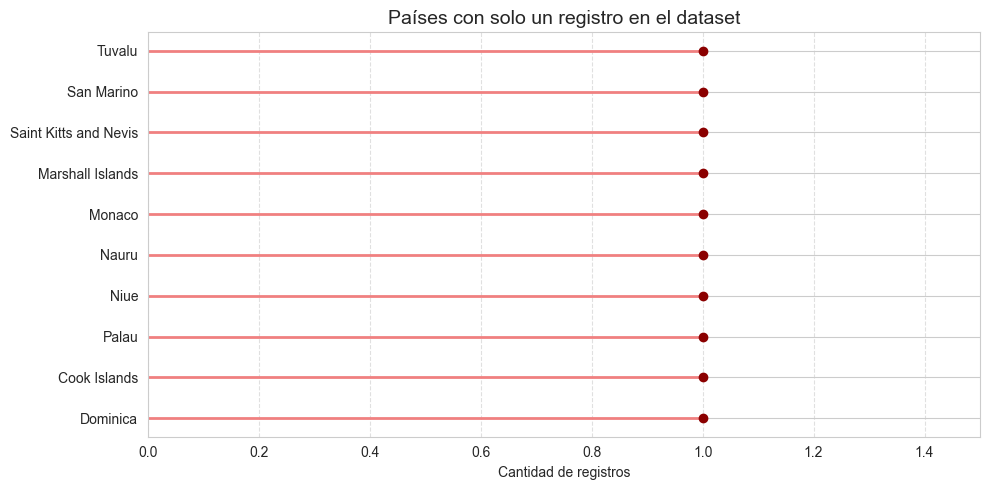

In [107]:
# Crear DataFrame con los países y la cantidad (todos 1)
one_entry_df = one_entry_countries.reset_index()
one_entry_df.columns = ['Country', 'Count']

# Crear gráfico Lollipop
plt.figure(figsize=(10, 5))
plt.hlines(y=one_entry_df['Country'], xmin=0, xmax=one_entry_df['Count'], color='lightcoral', linewidth=2)
plt.plot(one_entry_df['Count'], one_entry_df['Country'], 'o', color='darkred')

plt.title('Países con solo un registro en el dataset', fontsize=14)
plt.xlabel('Cantidad de registros')
plt.xlim(0, 1.5)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

<div style="text-align:justify; line-height: 1.9; "> 
Eliminando los países con solo un registro:
</div>

In [108]:
# Contar cuántos registros tiene cada país
country_count = df['Country'].value_counts()

# Identificar países que solo aparecen una vez
one_entry_countries = country_count[country_count == 1].index

# Eliminar esos países del dataframe
df = df[~df['Country'].isin(one_entry_countries)].reset_index(drop=True)


In [109]:
#Verificar eliminación
country_count = df['Country'].value_counts()
one_entry_countries = country_count[country_count==1]
one_entry_countries

Series([], Name: count, dtype: int64)

#### Imputación de valores nulos

In [110]:
#Suma de los valores nulos
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            193
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 32
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                443
Population                         644
thinness 10-19 years                32
thinness 5-9 years                  32
Income composition of resources    160
Schooling                          160
dtype: int64

In [111]:
# Filtrar solo las filas donde Alcohol es NaN
missing_alcohol = data[data['Alcohol'].isna()]

# Contar cuántos valores faltantes hay por país
missing_by_country = missing_alcohol['Country'].value_counts()

print(missing_by_country)

Country
South Sudan                           16
Montenegro                             2
Antigua and Barbuda                    1
Argentina                              1
Armenia                                1
                                      ..
Venezuela (Bolivarian Republic of)     1
Viet Nam                               1
Yemen                                  1
Zambia                                 1
Zimbabwe                               1
Name: count, Length: 178, dtype: int64


In [112]:
# Importamos la clase SimpleImputer de la biblioteca scikit-learn
from sklearn.impute import SimpleImputer
# Creamos una instancia del imputador que reemplazará los valores NaN con la media de la columna
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
# Aplicamos el imputador a la columna 'Alcohol', reemplazando los valores faltantes con la media
# El método fit_transform() calcula la media y reemplaza los valores en una sola operación
df['Alcohol'] = imputer.fit_transform(df[['Alcohol']])

In [113]:
#Comprobar que los valores nulos de la columna Alcohol se reemplazaron correctamente por la media
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 32
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                443
Population                         644
thinness 10-19 years                32
thinness 5-9 years                  32
Income composition of resources    160
Schooling                          160
dtype: int64

In [114]:
#Calculamos la media y reemplazamos los valores en una misma operación
df['Hepatitis B'] = imputer.fit_transform(df[['Hepatitis B']])

In [115]:
#Calculamos la media y reemplazamos los valores en una misma operación
df['BMI'] = imputer.fit_transform(df[['BMI']])

In [116]:
#Calculamos la media y reemplazamos los valores en una misma operación
df['Polio'] = imputer.fit_transform(df[['Polio']])

In [117]:
#Calculamos la media y reemplazamos los valores en una misma operación
df['Total expenditure'] = imputer.fit_transform(df[['Total expenditure']])

In [118]:
#Calculamos la media y reemplazamos los valores en una misma operación
df['Diphtheria'] = imputer.fit_transform(df[['Diphtheria']])

In [119]:
#Países con GDP nulo
countries_gdp_null = df[df['GDP'].isnull()]['Country'].unique()
countries_gdp_null

array(['Bahamas', 'Bolivia (Plurinational State of)', "Côte d'Ivoire",
       'Congo', 'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Egypt', 'Eritrea', 'Gambia',
       'Iran (Islamic Republic of)', 'Iraq', 'Kyrgyzstan',
       "Lao People's Democratic Republic", 'Libya',
       'Micronesia (Federated States of)', 'Papua New Guinea',
       'Republic of Korea', 'Republic of Moldova', 'Saint Lucia',
       'Saint Vincent and the Grenadines', 'Sao Tome and Principe',
       'Slovakia', 'Somalia', 'South Sudan', 'Syrian Arab Republic',
       'The former Yugoslav republic of Macedonia',
       'United Kingdom of Great Britain and Northern Ireland',
       'United Republic of Tanzania', 'United States of America',
       'Venezuela (Bolivarian Republic of)', 'Viet Nam', 'Yemen'],
      dtype=object)

In [120]:
#Calculamos la media y reemplazamos los valores en una misma operación
df['GDP'] = imputer.fit_transform(df[['GDP']])

In [121]:
#Calculamos la media y reemplazamos los valores en una misma operación
df['Population'] = imputer.fit_transform(df[['Population']])

In [122]:
#Calculamos la media y reemplazamos los valores en una misma operación
df['thinness 5-9 years'] = imputer.fit_transform(df[['thinness 5-9 years']])

In [123]:
#Calculamos la media y reemplazamos los valores en una misma operación
df['thinness 10-19 years'] = imputer.fit_transform(df[['thinness 10-19 years']])

In [124]:
#Países con Income composition of resources nulo
countries_gdp_null = df[df['Income composition of resources'].isnull()]['Country'].unique()
countries_gdp_null

array(["Côte d'Ivoire", 'Czechia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Republic of Korea',
       'Republic of Moldova', 'Somalia',
       'United Kingdom of Great Britain and Northern Ireland',
       'United Republic of Tanzania', 'United States of America'],
      dtype=object)

In [125]:
#Calculamos la media y reemplazamos los valores en una misma operación 
df['Income composition of resources'] = imputer.fit_transform(df[['Income composition of resources']])

In [126]:
#Países con Schooling of resources nulo
countries_gdp_null = df[df['Schooling'].isnull()]['Country'].unique()
countries_gdp_null

array(["Côte d'Ivoire", 'Czechia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Republic of Korea',
       'Republic of Moldova', 'Somalia',
       'United Kingdom of Great Britain and Northern Ireland',
       'United Republic of Tanzania', 'United States of America'],
      dtype=object)

In [127]:
#Calculamos la media y reemplazamos los valores en una misma operación
df['Schooling'] = imputer.fit_transform(df[['Schooling']])

In [128]:
#Varificando que todos los nulos se reemplazaron por la media
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness 10-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

### 1.5 Distribucion de variables

<div style="text-align:justify; line-height: 1.9; ">
Como parte del análisis exploratorio de datos, se realizó la visualización de la distribución de cada una de las variables numéricas del dataset. Esto permite comprender la forma en la que se distribuyen los datos, identificar posibles sesgos, asimetrías y la necesidad de realizar transformaciones o ajustes adicionales. Para ello se utilizaron histogramas con curvas de densidad suavizada que ofrecen una visión clara de la forma de cada variable.
</div>

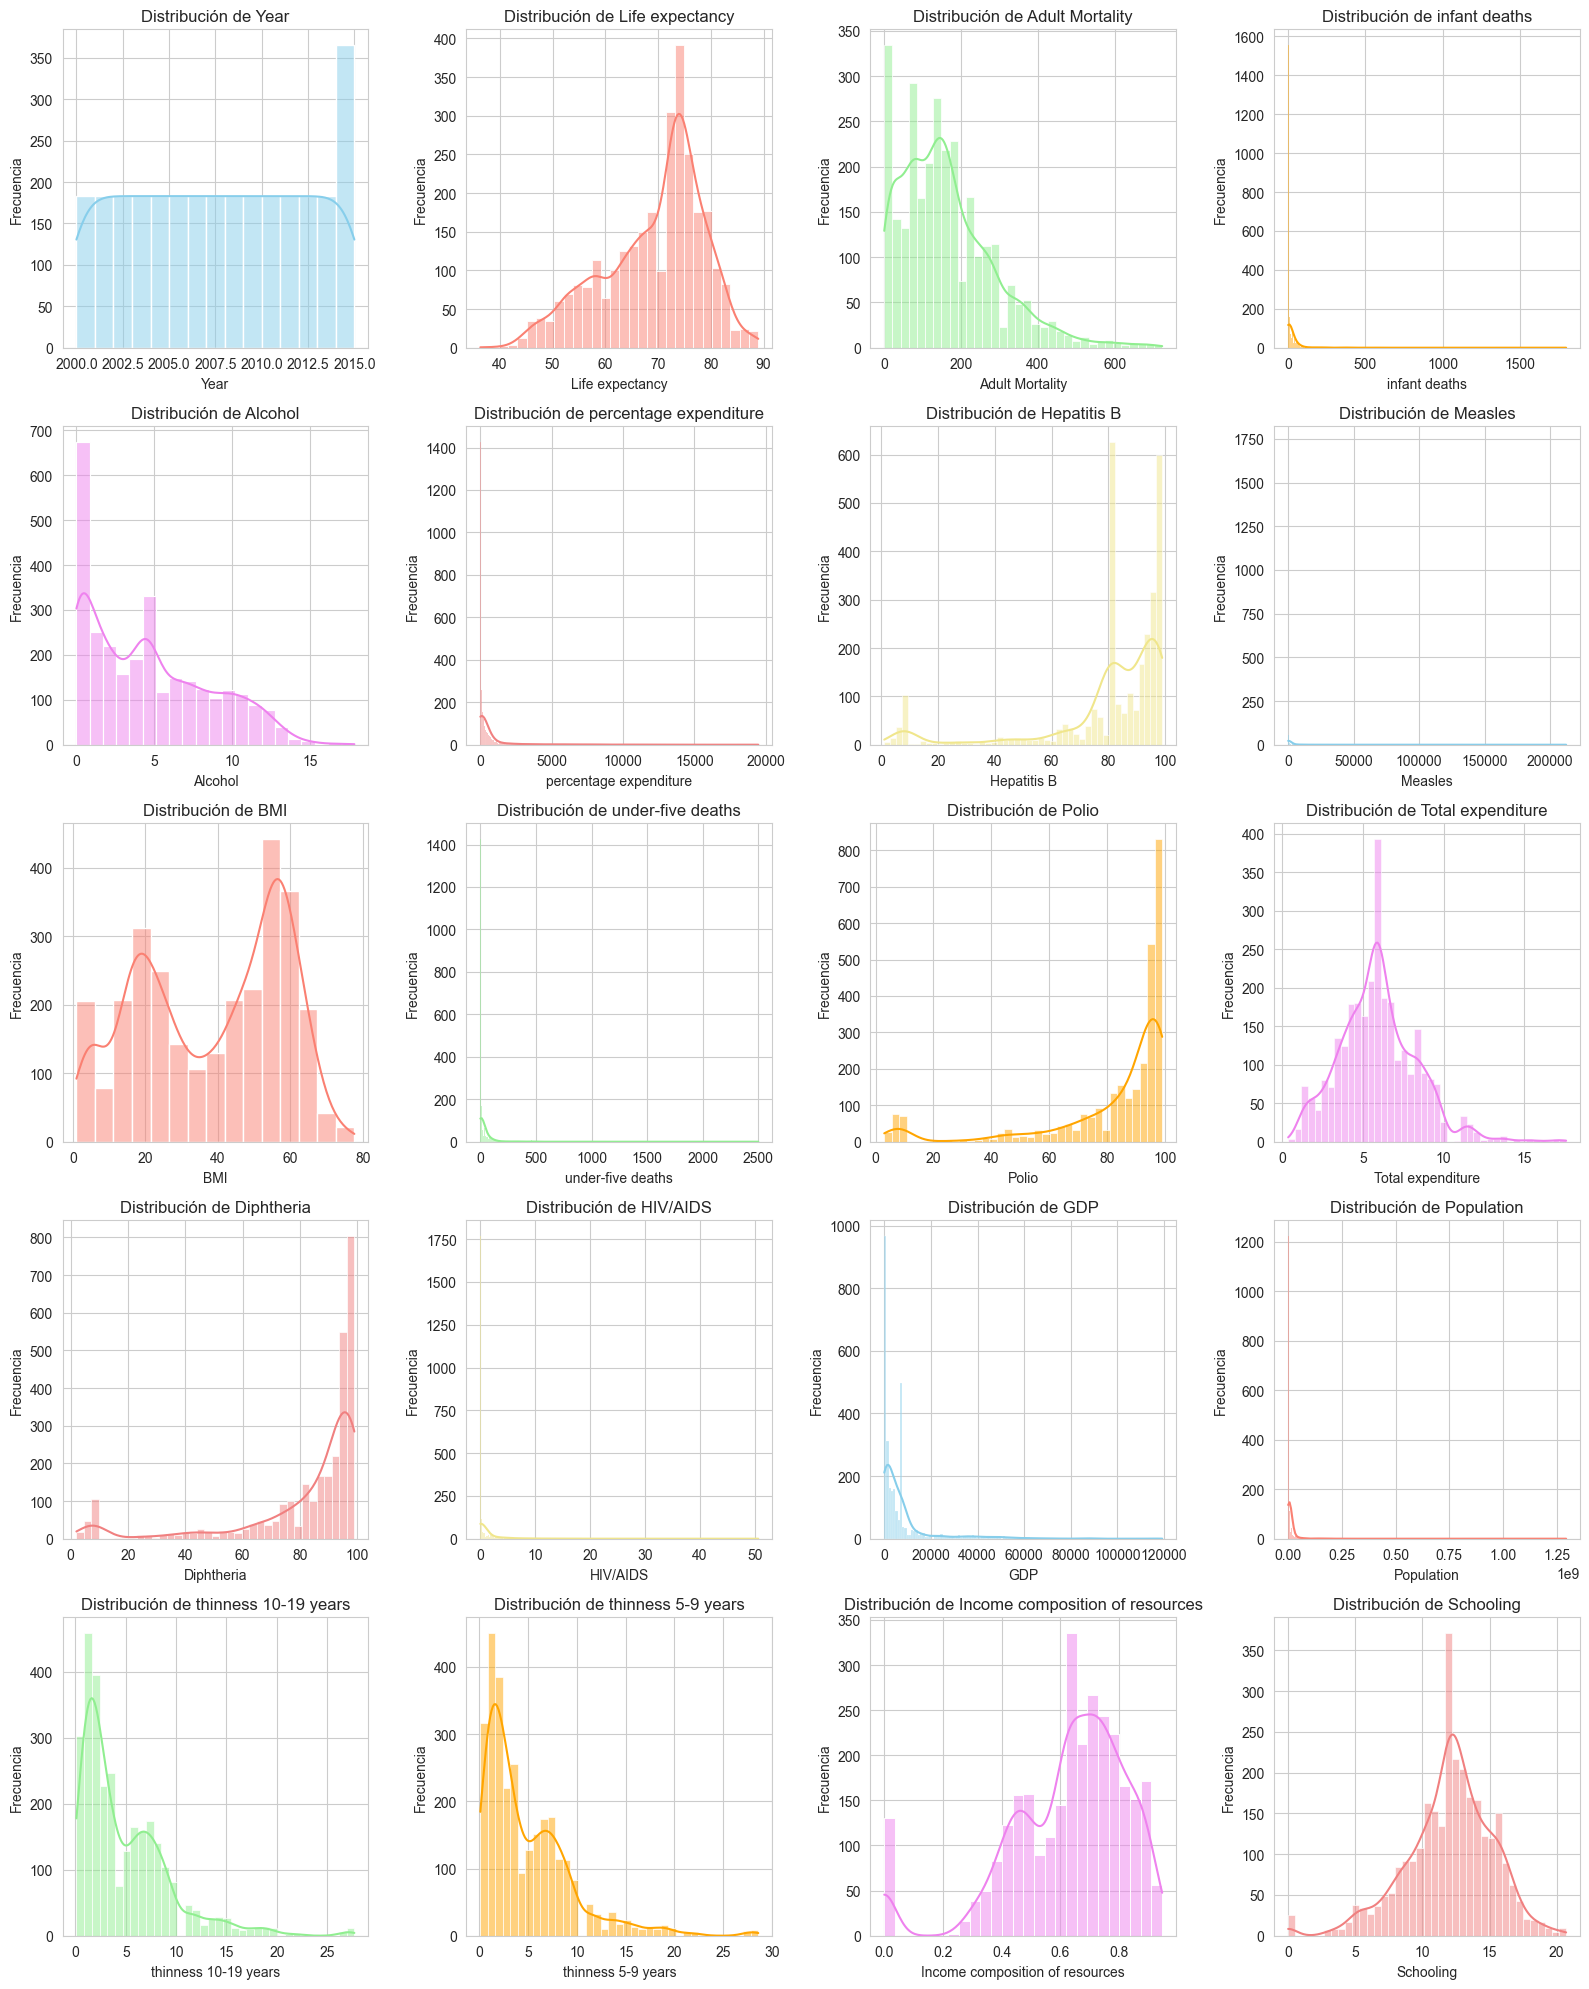

In [129]:
# Seleccionamos solo las columnas numéricas (int y float)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculamos el número total de variables numéricas seleccionadas
num_vars = len(numeric_cols)

# Definimos el número de columnas por fila para los subplots
cols = 4

# Calculamos el número de filas necesarias para acomodar todos los gráficos
rows = (num_vars + cols - 1) // cols  # Para asegurar redondeo hacia arriba

# Definimos una lista de colores personalizados para los histogramas
custom_colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'violet', 'lightcoral', 'khaki']

# Ajustamos el tamaño general de la figura según la cantidad de filas
plt.figure(figsize=(16, rows * 4))

# Iteramos sobre cada variable numérica para crear su histograma
for i, col in enumerate(numeric_cols):
    plt.subplot(rows, cols, i + 1)
    sns.histplot(df[col], kde=True, color=custom_colors[i % len(custom_colors)])
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

# Ajustamos el espacio entre los subplots para que no se sobrepongan
plt.tight_layout()

# Mostramos todos los gráficos
plt.show()


<div style="text-align:justify; line-height: 1.9; ">

La distribución de nuestra variable objetivo la cual es la esperanza de vida es aproximadamente nomral, pero con un pequeño sesgo en la izquierda.La mayoría de los valores de esperanza de vida se concentran entre aproximadamente 55 y 85 años

Mortalidad adulta está claramente sesgada a la derecha. La mayor concentración de registros se encuentra en valores bajos de mortalidad adulta, con una frecuencia que disminuye drásticamente a medida que aumenta la mortalidad. Esto sugiere que la mayoría de las poblaciones en el dataset tienen tasas bajas de mortalidad adulta, pero hay un número significativo de poblaciones con tasas moderadas y algunas con tasas muy altas.

Muertes infantiles está altamente sesgada a la derecha. La inmensa mayoría de los registros se agrupan en valores muy bajos de muertes infantiles (muy cerca de 0). La frecuencia cae drásticamente a medida que aumenta el número de muertes infantiles, con una cola  que se extiende hasta valores muy altos. Esto indica que en la mayoría de registros, el número de muertes infantiles es bajo, pero existen casos extremos con un número considerablemente elevado de muertes infantiles.

La distribución de Alcohol muestra un sesgo a la derecha. Hay un pico muy alto en valores bajos de consumo de alcohol. La frecuencia disminuye rápidamente a medida que aumenta el consumo, pero hay una cola que se extiende hacia valores más altos. La mayoría de las observaciones en el dataset tienen un consumo de alcohol bajo o nulo, pero hay un subconjunto con consumos moderados.

porcentaje de gasto está extremadamente sesgado a la derecha. Un número alto de observaciones se concentra en el valor cero, indicando que para la mayoría de las entradas no hay un "porcentaje de gasto" registrado o es muy bajo. Hay una cola muy larga que se extiende hacia valores de gasto mucho más altos, lo que sugiere que solo un pequeño número de observaciones tienen porcentajes de gasto significativos, llegando hasta 20000 o más.

Hepatitis B, esta distribución sugiere que hay un grupo grande de observaciones con una cobertura de Hepatitis B muy alta (cercana al 100%) y un grupo más pequeño con cobertura muy baja o nula. La frecuencia es menor en los valores intermedios.

La distribución de BMI sugiere que hay varias subpoblaciones o grupos de observaciones con diferentes rangos de IMC predominantes en el dataset. Aunque no es perfectamente simétrica, no muestra un sesgo fuerte general.

Gasto total, esta distribución muestra un sesgo a la derecha. Tiene un pico alto en valores relativamente bajos (alrededor de 5 a 7), y la frecuencia disminuye gradualmente a medida que aumenta el gasto total. Esto indica que la mayoría de las observaciones en el dataset tienen un gasto total bajo, con menos casos que reportan gastos totales más altos.

La distribución de GDP  está sesgada a la derecha. Un número muy alto de observaciones se concentra en valores de PIB bajos o muy bajos (cerca de 0). La frecuencia disminuye drásticamente a medida que el PIB aumenta, con una cola extremadamente larga que se extiende a valores muy altos. Esto es típico de datos económicos donde hay muchas entidades con PIBs bajos o moderados y un número pequeño de entidades con PIBs muy altos.

Distribución de delgadez 10-19 años está  sesgada a la derecha. Muestra un pico muy alto en valores bajos, indicando que la mayoría de las observaciones tienen un índice de delgadez bajo para este grupo de edad.

Distribución de delgadez 5-9 años también está fuertemente sesgada a la derecha. Esto sugiere que la mayoría de las observaciones también tienen un índice de delgadez bajo para este grupo de edad.

Distribución de escolaridad se parece más a una distribución aproximadamente normal o ligeramente sesgada a la izquierda. Tiene un pico alrededor de los 10-12 años de escolaridad.

</div>


### 1.6 Codificación de variables categóricas

<div style="text-align:justify; line-height: 1.9; ">

Codificando la variable status

</div>

In [130]:
#Hot ecoding
df = pd.get_dummies(df,columns=['Status'],drop_first=True)
print(df.columns)

Index(['Country', 'Year', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness 10-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Status_Developing'],
      dtype='object')


In [131]:
#Ver tipo de dato
print(df['Status_Developing'].dtype)

bool


In [132]:
#Convertir a 0 y 1
df['Status_Developing'] = df['Status_Developing'].astype(int)


In [133]:
#Muestra las primeras 5 filas del dataframe
df.head()

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developing
0,Afghanistan,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,1
1,Afghanistan,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,1
2,Afghanistan,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,1
3,Afghanistan,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,1
4,Afghanistan,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,1


#### Matriz de correlación con valores p

<div style="text-align:justify; line-height: 1.9; ">

En esta sección se calculó una matriz de correlación de Pearson entre todas las variables numéricas del dataset, incluyendo aquellas codificadas mediante one-hot encoding. Además de los coeficientes de correlación 𝑟, también se calcularon los valores-p asociados a cada par, utilizando la función stats.pearsonr de scipy, lo que permite evaluar la significancia estadística de cada correlación. Para facilitar su interpretación, se generó un mapa de calor que muestra en cada celda el valor de 𝑟 junto con su correspondiente p-value en notación científica.

</div>


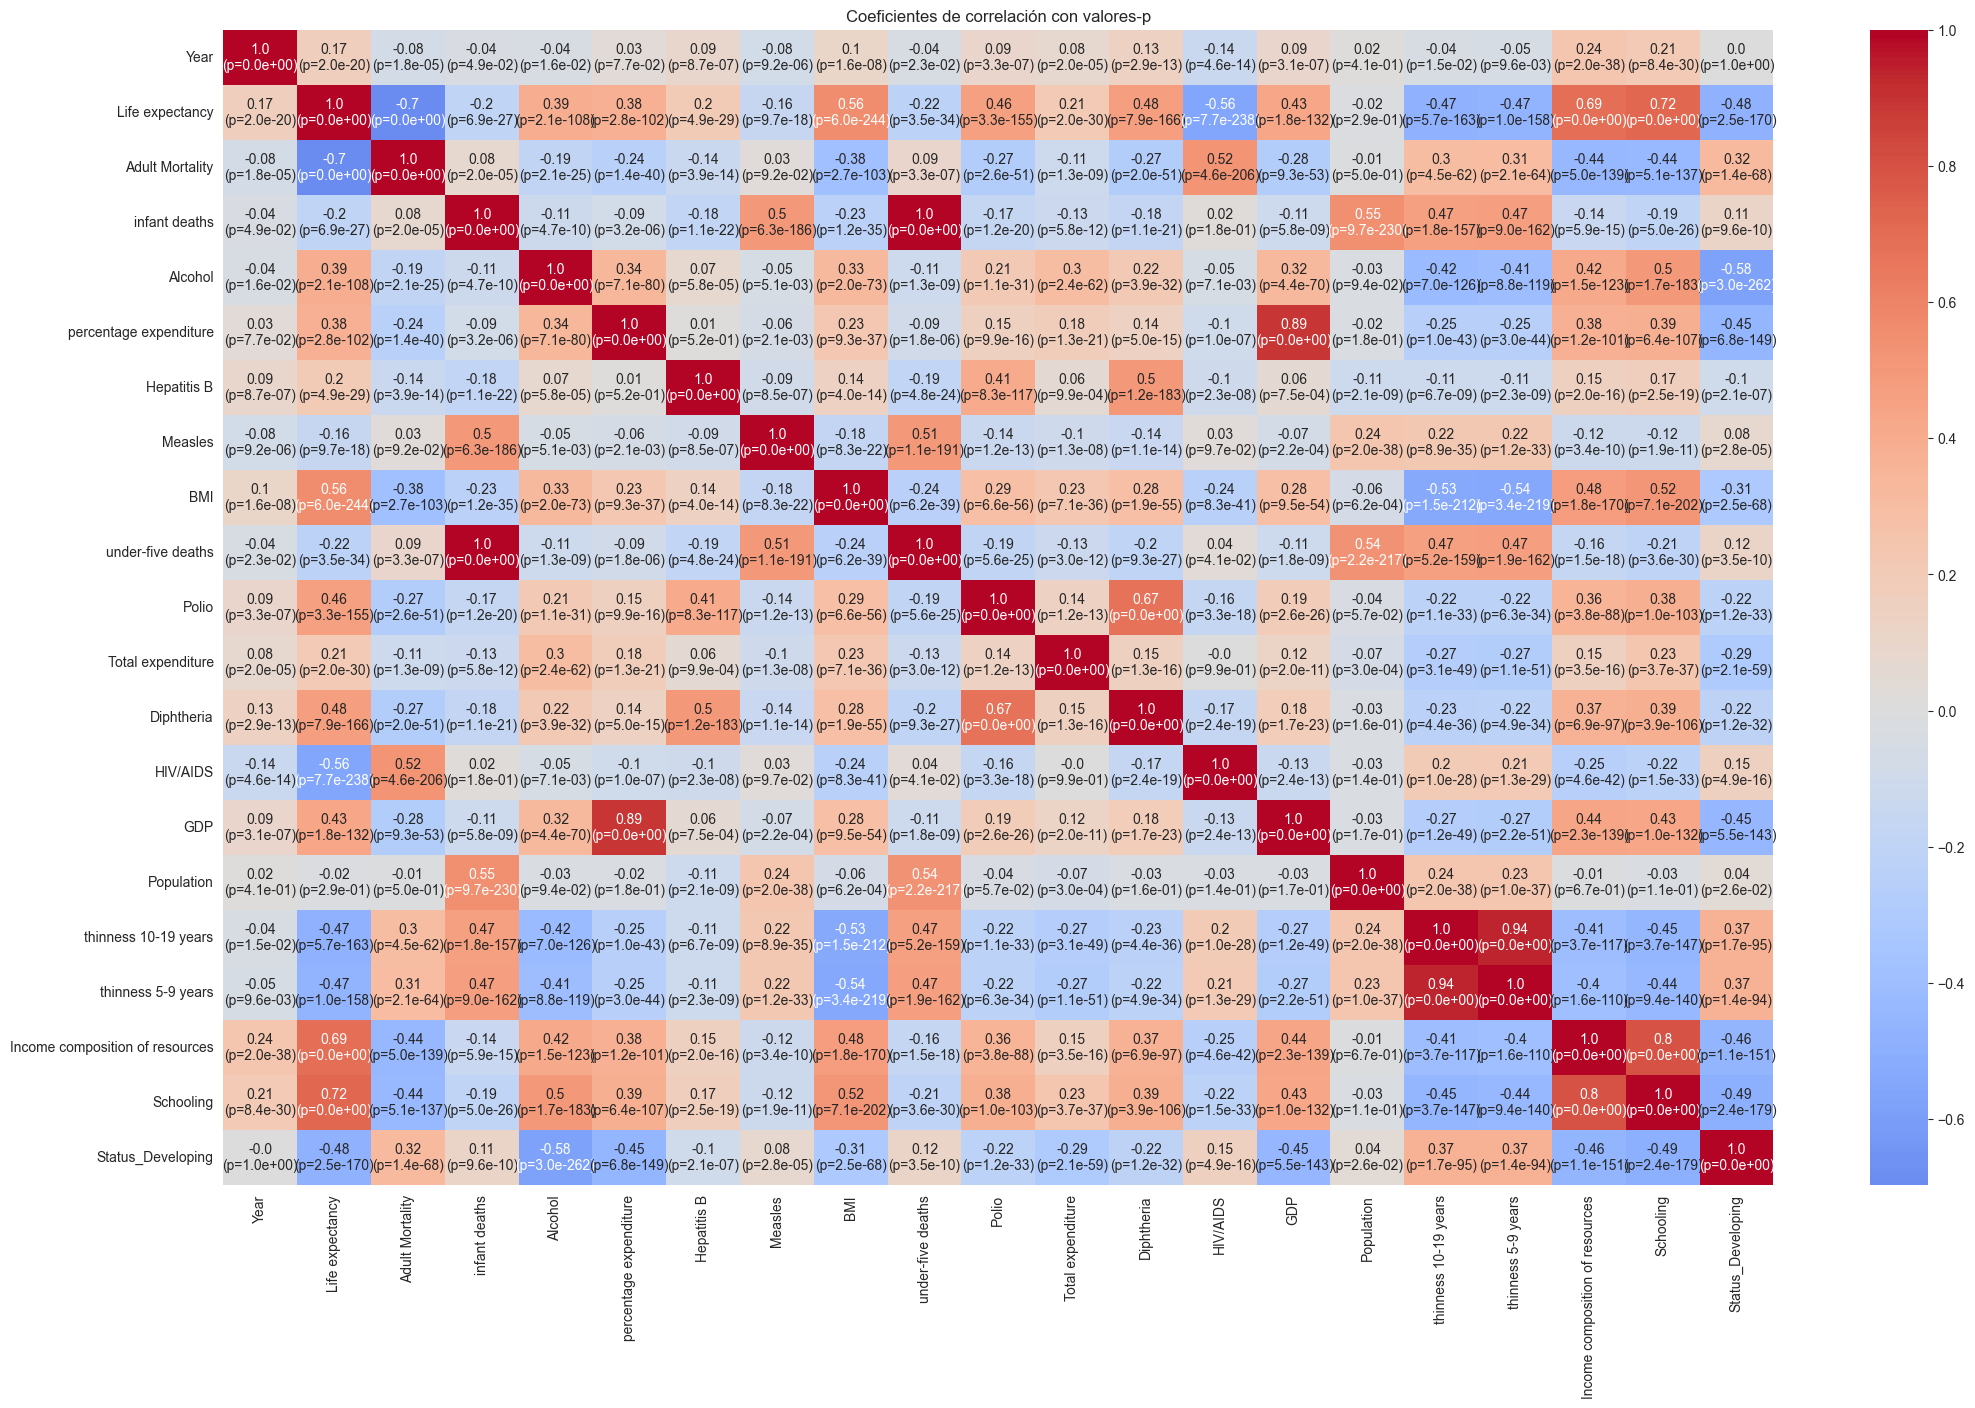

In [134]:
from scipy import stats

#Función para crear matriz de correlación con p-valores y coeficientes de correlación
def corr_pvalues(data):
    data = data.dropna()
    df_cols = data.select_dtypes(include=[np.number]).columns
    pvals = pd.DataFrame(np.ones((len(df_cols), len(df_cols))), columns=df_cols, index=df_cols)
    r_vals = pd.DataFrame(np.ones((len(df_cols), len(df_cols))), columns=df_cols, index=df_cols)
    for col1 in df_cols:
        for col2 in df_cols:
            r, p = stats.pearsonr(data[col1], data[col2])
            pvals.loc[col1, col2] = p
            r_vals.loc[col1, col2] = r
    return r_vals, pvals

r_vals, p_vals = corr_pvalues(df)

#Notación científica para los p-valores
annot = r_vals.round(2).astype(str) + "\n(p=" + p_vals.applymap(lambda x: f"{x:.1e}") + ")"

#Tamaño
plt.figure(figsize=(25, 15))

#Mapa de calor
sns.heatmap(r_vals.astype(float), annot=annot, fmt='', cmap='coolwarm', center=0)

#Título
plt.title('Coeficientes de correlación con valores-p')

#Mostrar gráfico
plt.show()

<div style="text-align:justify; line-height: 1.9; ">

A partir de los resultados obtenidos en la matriz de correlación, se extrajeron específicamente los coeficientes 𝑟 y los valores-p asociados a la variable objetivo stroke, con el fin de determinar qué variables están significativamente correlacionadas con ella.

Estas **variables con correlaciones significativas serán tomadas con mayor atención en el proceso de modelado**, ya que presentan una evidencia estadística real de asociación con la esperanza de vida. Por otro lado, aquellas variables sin correlación significativa las consideraremos candidatas a ser descartadas o recibir menos prioridad en la selección de variables predictoras.

</div>

In [135]:
alpha = 0.05

#Obtener los p-valores relacionados con 'strokes'
le_pvals = p_vals['Life expectancy'].drop('Life expectancy')  
le_corrs = r_vals['Life expectancy'].drop('Life expectancy')

#Variables significativamente correlacionadas
significativas = le_pvals[le_pvals < alpha]

#Variables no significativamente correlacionadas
no_significativas = le_pvals[le_pvals >= alpha]

#Imprimir lista
print("Variables con correlación significativa con 'Life expectancy':\n")
for var in significativas.index:
    print(f"- {var}: r = {le_corrs[var]:.2f}, p = {le_pvals[var]:.3e}")

#Imprimir lista
print("\nVariables SIN correlación significativa con 'Life expectancy':\n")
for var in no_significativas.index:
    print(f"- {var}: r = {le_corrs[var]:.2f}, p = {le_pvals[var]:.3e}")


Variables con correlación significativa con 'Life expectancy':

- Year: r = 0.17, p = 1.964e-20
- Adult Mortality: r = -0.70, p = 0.000e+00
- infant deaths: r = -0.20, p = 6.878e-27
- Alcohol: r = 0.39, p = 2.098e-108
- percentage expenditure: r = 0.38, p = 2.773e-102
- Hepatitis B: r = 0.20, p = 4.938e-29
- Measles: r = -0.16, p = 9.727e-18
- BMI: r = 0.56, p = 5.981e-244
- under-five deaths: r = -0.22, p = 3.546e-34
- Polio: r = 0.46, p = 3.261e-155
- Total expenditure: r = 0.21, p = 1.956e-30
- Diphtheria: r = 0.48, p = 7.930e-166
- HIV/AIDS: r = -0.56, p = 7.671e-238
- GDP: r = 0.43, p = 1.846e-132
- thinness 10-19 years: r = -0.47, p = 5.684e-163
- thinness 5-9 years: r = -0.47, p = 1.030e-158
- Income composition of resources: r = 0.69, p = 0.000e+00
- Schooling: r = 0.72, p = 0.000e+00
- Status_Developing: r = -0.48, p = 2.465e-170

Variables SIN correlación significativa con 'Life expectancy':

- Population: r = -0.02, p = 2.883e-01


#### Codificación variable country

<div style="text-align:justify; line-height: 1.9; ">

Debido a que la variable Country contiene más de 190 países diferentes, decidimos posponer su codificación hasta después del análisis de correlación. Incluirla desde el inicio habría generado una gran cantidad de columnas dummy, lo que habría afectado negativamente la legibilidad de la matriz de correlación y dificultado la interpretación visual de las relaciones entre variables. Esto nos permitió incorporar la información geográfica sin perder claridad en el análisis inicial.

</div>

In [136]:
df = pd.get_dummies(df, columns=['Country'], drop_first=True)

## 2. Regresión Lineal Múltiple: Implementación manual del algoritmo de Gradiente Descendente

<div style="text-align:justify; line-height: 1.9; ">

### 2.1 Fundamentos Matemáticos de la Regresión Lineal Múltiple con Descenso de Gradiente

---

Dado un conjunto de características $ \mathbf{x} \in \mathbb{R}^n $, un vector de pesos $ \mathbf{w} \in \mathbb{R}^n $, y un término independiente $ b \in \mathbb{R} $, la predicción del modelo se define como:

$$
\hat{y} = \mathbf{w}^\top \mathbf{x} + b
$$

Este modelo busca ajustar una línea (o hiperplano) que minimice la diferencia entre las predicciones \( \hat{y} \) y los valores reales \( y \).

---

#### Función de pérdida: Error Cuadrático Medio (MSE)

La función objetivo a minimizar es el error cuadrático medio:

$$
\mathcal{L}(\mathbf{w}, b) = \frac{1}{n} \sum_{i=1}^{n} (y^{(i)} - \hat{y}^{(i)})^2
$$

donde:
- $n$: número de ejemplos  
- $y^{(i)}$: valor real del ejemplo $i$  
- $\hat{y}^{(i)} = \mathbf{w}^\top \mathbf{x}^{(i)} + b$: predicción del modelo para el ejemplo $i$


---

#### Descenso de Gradiente: Cálculo de Derivadas

Para minimizar $ \mathcal{L}(\mathbf{w}, b) $, usamos el método de **descenso de gradiente**, calculando las derivadas parciales respecto a los parámetros.


#### Gradiente con respecto a los pesos:

$$
\frac{\partial \mathcal{L}}{\partial \mathbf{w}} = -\frac{2}{n} \sum_{i=1}^{n} \mathbf{x}^{(i)} (y^{(i)} - \hat{y}^{(i)})
$$

#### Gradiente con respecto al intercepto:

$$
\frac{\partial \mathcal{L}}{\partial b} = -\frac{2}{n} \sum_{i=1}^{n} (y^{(i)} - \hat{y}^{(i)})
$$

---

#### Regla de Actualización

Aplicamos la regla de actualización iterativa con una tasa de aprendizaje $ \alpha $:


- Para los pesos:

$$
\mathbf{w} := \mathbf{w} - \alpha \cdot \frac{\partial \mathcal{L}}{\partial \mathbf{w}}
$$

- Para el intercepto:

$$
b := b - \alpha \cdot \frac{\partial \mathcal{L}}{\partial b}
$$

---

### 2.2 Iteración del Modelo

Este proceso se repite por un número determinado de iteraciones hasta que el error converge a un valor mínimo, es decir, cuando el modelo ha aprendido la mejor combinación de pesos que minimiza la función de pérdida.

</div>



In [137]:
class MultipleLinearRegressionGradientDescent():
    # Constructor: inicializa los parámetros del modelo
    def __init__(self,n_iterations,learning_rate):
        # Vector de pesos
        self.weights = None
        # Término independiente (bias) 
        self.intercept = None
        # Número de iteraciones para entrenar
        self.n_iterations = n_iterations
         # Tasa de aprendizaje  η
        self.lr = learning_rate
         # Lista para guardar el error cuadrático medio en cada iteración
        self.errors = []
    # Función que realiza una actualización de los pesos y el bias
    def _Gradient_Descent(self,n_samples,X,y_preds,y_act):
        # Derivada de la función de costo MSE con respecto a los pesos
        self._Dw = (-1)*(1/n_samples)*np.dot(X.transpose(),(y_act-y_preds))
        # Derivada con respecto al intercepto (término independiente)
        self._Di = (-1)*(1/n_samples)*np.sum(y_act-y_preds)
        # Actualización de los pesos
        self.weights = self.weights-(self.lr*self._Dw)
         # Actualización del intercepto
        self.intercept = self.intercept-(self.lr*self._Di)
    # Método para entrenar el modelo con los datos de entrada X y salidas y
    def fit(self,X,y):
        # Número de ejemplos y características
        n_samples,n_features = X.shape
         # Inicializa pesos en cero
        self.weights = np.zeros(n_features)
        # Inicializa el bias en cero
        self.intercept = 0
        # Ciclo de entrenamiento por número de iteraciones especificado
        for _ in range(self.n_iterations):
             # Predicción
            y_preds = self.intercept+X.dot(self.weights)
             # Error cuadrático medio
            error = np.mean((y-y_preds)**2)
             # Guarda el error para graficar o monitorear convergencia
            self.errors.append(error)
            # Realiza una actualización de los pesos y el bias
            self._Gradient_Descent(n_samples,X,y_preds,y)
    # Método para hacer predicciones con nuevos datos
    def predict(self,x):
        # Convierte a numpy array si no lo es
        if type(x) != 'numpy.ndarray':
            x = np.array(x)
        # Calcula ŷ = Xw + b y devuelve el resultado
        return self.intercept + x.dot(self.weights)

## 3. Entrenamiento del modelo

### 3.1 División prueba y entrenamiento

<div style="text-align:justify; line-height: 1.9; ">

En esta etapa se divide el conjunto de datos en dos subconjuntos: uno para entrenar el modelo (80%) y otro para evaluarlo (20%). Se seleccionan como variables independientes (X) aquellas columnas del DataFrame que posterior al análisis mostraron estar  correlacionadas significativamente con la variable la esperanza de vida. Posteriormente, se realiza la separación utilizando la función train_test_split de sklearn, asegurando la aleatoriedad con random_state=42 para reproducibilidad.

</div>

#### Modelo 1

In [138]:
from sklearn.model_selection import train_test_split
X = df[['Year', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'thinness 10-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling', 'Status_Developing']]
y = df['Life expectancy']

#Dividir el entrenamiento y las pruebas 80% train 20% test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#### Escalado de features

<div style="text-align:justify; line-height: 1.9; ">

Antes de entrenar el modelo, es necesario escalar las características para asegurar que todas tengan la misma importancia durante el proceso de optimización. Algunas variables pueden tienen rangos muy distintos como GDP e Income composition of resources, lo cual podría afectar negativamente el desempeño del descenso de gradiente. Se utiliza el escalado estándar para transformar las variables de entrenamiento a una distribución de media 0 y desviación estándar 1. Luego, se transforma el conjunto de prueba con los mismos parámetros.

</div>

In [139]:
# Aplica estandarización (media = 0, desviación estándar = 1) a los datos de entrenamiento y prueba
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [140]:
# Datos de entrenamiento transformados con escala estándar (normalizados)
X_train_scaled

array([[ 9.66330717e-01, -3.22816943e-01, -2.56631698e-01, ...,
         6.91502436e-01,  6.14378974e-01,  4.57259462e-01],
       [-1.20559494e+00,  1.03722580e-01, -2.65419478e-01, ...,
         2.76639651e-01,  1.53254804e-01,  4.57259462e-01],
       [ 9.75604525e-02,  1.68916194e+00,  5.43056296e-01, ...,
         2.13242248e-03, -5.64313724e-04,  4.57259462e-01],
       ...,
       [-5.54017246e-01, -1.10346475e+00, -1.16027215e-01, ...,
        -8.64233009e-01, -1.16863448e+00,  4.57259462e-01],
       [-1.42278751e+00, -7.33260636e-01, -2.47843917e-01, ...,
         9.92771840e-01,  8.91053476e-01, -2.18694217e+00],
       [-9.88402379e-01,  1.42358073e+00, -2.03905017e-01, ...,
        -3.09658990e+00, -2.24459088e+00,  4.57259462e-01]],
      shape=(2342, 19))

<div style="text-align:justify; line-height: 1.9; ">

Se entrena un modelo de regresión lineal múltiple implementado desde cero usando el algoritmo de descenso de gradiente. Se crea una instancia de la clase MultipleLinearRegressionGradientDescent, especificando el número de iteraciones y la tasa de aprendizaje. Luego se ajusta el modelo al conjunto de entrenamiento escalado  y a la variable dependiente. Durante el entrenamiento, se almacena el error cuadrático medio (MSE) en cada iteración, lo que permite analizar si el modelo está convergiendo correctamente.

</div>

In [141]:
# Crea y entrena un modelo de regresión lineal múltiple usando descenso por gradiente
model = MultipleLinearRegressionGradientDescent(n_iterations=500, learning_rate=0.01)
model.fit(X_train_scaled, y_train)

<div style="text-align:justify; line-height: 1.9; ">

Una vez finalizado el entrenamiento, se muestran los coeficientes calculados para cada variable independiente, así como el intercepto del modelo. Estos coeficientes indican la magnitud e influencia de cada predictor sobre la esperanza de vida. Por ejemplo, un coeficiente negativo implica que un aumento en esa variable reduce la esperanza de vida, mientras que un coeficiente positivo sugiere lo contrario.

</div>

In [142]:
# Muestra el modelo entrenado: coeficientes y término independiente (intercepto) redondeados
print('The Calculated Model:')
print('The Coefficients = {}'.format(model.weights.round(4)))
print('The Intercept {:.4f}'.format(model.intercept))

The Calculated Model:
The Coefficients = [-1.9000e-03 -2.5927e+00  1.5300e-01  1.7850e-01  2.3360e-01 -3.6920e-01
 -3.8770e-01  8.9000e-01 -2.7740e-01  8.2940e-01  1.2750e-01  1.0652e+00
 -2.5180e+00  3.5230e-01 -2.7640e-01 -6.0400e-02  1.4405e+00  1.9462e+00
 -5.4670e-01]
The Intercept 68.6947


<div style="text-align:justify; line-height: 1.9; ">

En la siguiente figura se representa la evolución del error cuadrático medio en función de las iteraciones. Se observa cómo el error disminuye progresivamente, lo que indica que el algoritmo de descenso de gradiente está aprendiendo correctamente los parámetros del modelo.

</div>

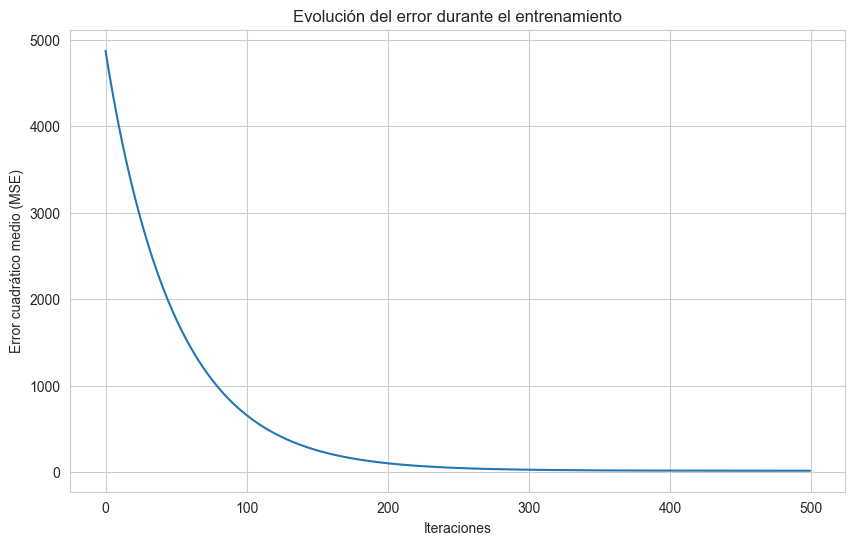

In [143]:
# Grafica la evolución del error cuadrático medio (MSE) a lo largo de las iteraciones del entrenamiento
plt.figure(figsize=(10,6))
plt.plot(range(model.n_iterations), model.errors)
plt.xlabel('Iteraciones')
plt.ylabel('Error cuadrático medio (MSE)')
plt.title('Evolución del error durante el entrenamiento')
plt.grid(True)
plt.show()

<div style="text-align:justify; line-height: 1.9; ">
Una vez entrenado el modelo, se procede a realizar predicciones sobre el conjunto de prueba escalado, y_pred contiene los valores estimados de esperanza de vida para cada muestra de prueba, calculados usando los coeficientes obtenidos durante el entrenamiento.
</div>

In [144]:
# Genera las predicciones del modelo usando los datos de prueba escalados
y_pred = model.predict(X_test_scaled)
y_pred

array([54.40292422, 68.31477702, 79.72507947, 76.43524969, 57.00080514,
       64.10047731, 72.89485374, 74.85766943, 75.88725261, 72.09518206,
       72.90659626, 77.15260973, 36.06516192, 48.83986205, 72.67899234,
       74.24410633, 75.73922262, 78.32764515, 77.97886617, 70.88349447,
       68.55821628, 79.58821112, 59.68643041, 64.2045851 , 68.04284612,
       41.53946199, 52.99982704, 74.13986806, 65.18434632, 81.56842475,
       72.30612347, 70.64504668, 61.8745088 , 67.57948994, 73.83128591,
       54.50409804, 73.24572588, 70.26631245, 76.6922808 , 70.17928454,
       57.39221412, 71.27770049, 77.85803681, 61.99762707, 53.82109433,
       71.14909762, 77.39344101, 68.4047002 , 68.23458538, 62.812903  ,
       72.14043706, 73.34400797, 68.03360247, 59.03618352, 67.59797867,
       70.38722508, 70.45618159, 70.16649814, 72.36216426, 55.36536419,
       69.52965931, 66.59028262, 56.84747319, 60.43530711, 55.83578216,
       79.93413919, 61.14657245, 65.13667055, 72.80354606, 73.45

<div style="text-align:justify; line-height: 1.9; ">

Para facilitar la comparación entre los valores predichos y los valores reales, se construye un DataFrame que contiene ambas columnas: Valor real y Predicción. Este paso es fundamental para evaluar la calidad del modelo, permitiendo visualizar qué tan cercanas son las predicciones a los valores reales.

</div>

In [145]:
# Crea un DataFrame para comparar los valores reales con las predicciones y muestra las primeras 10 filas
resultados = pd.DataFrame({
    'Valor real': y_test,
    'Predicción': y_pred
})

print(resultados.head(10))  

      Valor real  Predicción
2390        56.5   54.402924
196         73.0   68.314777
2307        82.5   79.725079
1731        75.6   76.435250
1100        53.0   57.000805
1192        65.2   64.100477
1505        72.4   72.894854
1159        74.1   74.857669
322         77.0   75.887253
1350        67.8   72.095182


<div style="text-align:justify; line-height: 1.9; ">

Una vez realizadas las predicciones sobre el conjunto de prueba, se procede a evaluar cuantitativamente el rendimiento del modelo mediante dos métricas fundamentales: el error cuadrático medio (MSE) y el coeficiente de determinación $R^2$.

</div>

In [146]:
# Lista vacía para almacenar los resultados de distintos modelos
resultados_modelos = []

In [147]:
# Calcula y muestra el error cuadrático medio (MSE) entre los valores reales y las predicciones
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse:.4f}')

MSE: 16.5941


In [148]:
# Calcula y muestra el coeficiente de determinación R² para evaluar el desempeño del modelo
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(f'R²: {r2:.4f}')

R²: 0.8082


In [149]:
# Guarda en la lista los resultados del modelo actual: variables usadas, R² y MSE
resultados_modelos.append({
    'Variables': X.columns.tolist(),
    'R2': r2_score(y_test, y_pred),
    'MSE': mean_squared_error(y_test, y_pred)
})

### 3.2 Comparación de múltiples modelos de regresión lineal entrenados con descenso de gradiente

<div style="text-align:justify; line-height: 1.9; ">

En esta sección se entrenarán múltiples modelos de regresión lineal múltiple utilizando el algoritmo de descenso de gradiente, variando las combinaciones de variables independientes (features) utilizadas como predictores. 

Cada modelo será evaluado en función de dos métricas:

- El **error cuadrático medio (MSE)**, que mide la magnitud del error de las predicciones.
- El **coeficiente de determinación $R^2$**, que indica la proporción de la variabilidad de la variable dependiente explicada por el modelo.

El objetivo es **identificar la combinación de variables que produzca el mejor ajuste**, es decir, aquella que **minimice el MSE** y **maximice el $R^2$** sobre el conjunto de prueba. 

</div>


#### Modelo 2

In [150]:
X = df[['Total expenditure', 'Diphtheria', 'Schooling', 'HIV/AIDS', 'Income composition of resources', 'percentage expenditure', 'thinness 10-19 years', 'Adult Mortality', 'Status_Developing', 'BMI']]
y = df['Life expectancy']

#Dividir el entrenamiento y las pruebas 80% train 20% test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Escalamiento
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# Entrenamiento del modelo
model = MultipleLinearRegressionGradientDescent(n_iterations=500, learning_rate=0.01)
model.fit(X_train_scaled, y_train)

# Predicciones
y_pred = model.predict(X_test_scaled)

# Evaluación
r2 = r2_score(y_test, y_pred)
print(f'R²: {r2:.4f}')

mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse:.4f}')

resultados_modelos.append({
    'Variables': X.columns.tolist(),
    'R2': r2_score(y_test, y_pred),
    'MSE': mean_squared_error(y_test, y_pred)
})

# Mostrar primeros resultados
resultados = pd.DataFrame({
    'Valor real': y_test,
    'Predicción': y_pred
})

print(resultados.head(10))

R²: 0.8076
MSE: 16.6388
      Valor real  Predicción
2390        56.5   54.571679
196         73.0   68.007262
2307        82.5   79.713629
1731        75.6   75.248831
1100        53.0   55.866950
1192        65.2   65.080176
1505        72.4   72.992370
1159        74.1   74.114640
322         77.0   76.218458
1350        67.8   72.112437


#### Modelo 3

In [151]:
from sklearn.model_selection import train_test_split
X_three = df[['Schooling', 'Income composition of resources', 'Adult Mortality', 'percentage expenditure', 'Status_Developing', 'HIV/AIDS','Diphtheria', 'Total expenditure', 'BMI']]
y_three = df['Life expectancy']

#Dividir el entrenamiento y las pruebas 80% train 20% test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=40)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = MultipleLinearRegressionGradientDescent(n_iterations=500, learning_rate=0.01)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(f'R²: {r2:.4f}')

mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse:.4f}')

resultados_modelos.append({
    'Variables': X.columns.tolist(),
    'R2': r2_score(y_test, y_pred),
    'MSE': mean_squared_error(y_test, y_pred)
})

resultados = pd.DataFrame({
    'Valor real': y_test,
    'Predicción': y_pred
})

print(resultados.head(10)) 

R²: 0.7909
MSE: 17.5509
      Valor real  Predicción
1793        65.9   66.476711
270         68.2   73.306874
213         74.7   74.601625
2337        87.0   80.561140
678         79.3   79.665434
1664        74.6   73.159444
712         68.5   69.167732
2118        73.1   76.285816
2882        65.4   63.481496
1737        73.8   70.235800


#### Modelo 4

In [152]:
X = df.drop(columns=['Life expectancy'])
y = df['Life expectancy']

#Dividir el entrenamiento y las pruebas 80% train 20% test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Escalamiento
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# Entrenamiento del modelo
model = MultipleLinearRegressionGradientDescent(n_iterations=500, learning_rate=0.01)
model.fit(X_train_scaled, y_train)

# Predicciones
y_pred = model.predict(X_test_scaled)

# Evaluación
r2 = r2_score(y_test, y_pred)
print(f'R²: {r2:.4f}')

mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse:.4f}')

resultados_modelos.append({
    'Variables': X.columns.tolist(),
    'R2': r2_score(y_test, y_pred),
    'MSE': mean_squared_error(y_test, y_pred)
})

# Mostrar primeros resultados
resultados = pd.DataFrame({
    'Valor real': y_test,
    'Predicción': y_pred
})

print(resultados.head(10))

R²: 0.9407
MSE: 5.1258
      Valor real  Predicción
2390        56.5   57.646194
196         73.0   69.784861
2307        82.5   82.772237
1731        75.6   77.917900
1100        53.0   52.572826
1192        65.2   65.441499
1505        72.4   72.290644
1159        74.1   72.412529
322         77.0   79.181570
1350        67.8   67.224034


#### Modelo 5

In [153]:
# Filtrar columnas que empiezan con 'Country_'
country_cols = [col for col in df.columns if col.startswith('Country_')]

# Lista de variables base (puedes ajustar según lo que uses)
base_features = ['Schooling', 'Adult Mortality', 'Status_Developing',
                  'Total expenditure', 'Income composition of resources',
                 'percentage expenditure', 'HIV/AIDS','Measles','under-five deaths','Year','thinness 10-19 years','Polio']

# Unir base + columnas de país
selected_features = base_features + country_cols

# Seleccionar variables predictoras y target
X = df[selected_features]
y = df['Life expectancy']

#Dividir el entrenamiento y las pruebas 80% train 20% test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=40)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model5 = MultipleLinearRegressionGradientDescent(n_iterations=500, learning_rate=0.01)
model5.fit(X_train_scaled, y_train)

y_pred = model5.predict(X_test_scaled)

from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(f'R²: {r2:.4f}')

mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse:.4f}')

resultados_modelos.append({
    'Variables': X.columns.tolist(),
    'R2': r2_score(y_test, y_pred),
    'MSE': mean_squared_error(y_test, y_pred)
})

resultados = pd.DataFrame({
    'Valor real': y_test,
    'Predicción': y_pred
})

print(resultados.head(10)) 

R²: 0.9447
MSE: 4.6410
      Valor real  Predicción
1793        65.9   66.328828
270         68.2   68.601491
213         74.7   73.330842
2337        87.0   78.956595
678         79.3   79.969887
1664        74.6   74.334454
712         68.5   68.426059
2118        73.1   74.770288
2882        65.4   65.056974
1737        73.8   75.028021


In [154]:
#Convertir lista en un dataFrame
df_resultados = pd.DataFrame(resultados_modelos)


In [155]:
#Tabla con r^2 y MSE
df_resultados.reset_index(drop=True, inplace=True)
df_resultados

,Variables,R2,MSE
0,"[Year, Adult Mortality, infant deaths, Alcohol...",0.808159,16.594106
1,"[Total expenditure, Diphtheria, Schooling, HIV...",0.807643,16.638767
2,"[Total expenditure, Diphtheria, Schooling, HIV...",0.790902,17.550891
3,"[Year, Adult Mortality, infant deaths, Alcohol...",0.940742,5.125807
4,"[Schooling, Adult Mortality, Status_Developing...",0.944708,4.641007


In [156]:
#Asignando nombres de modelo
df_resultados['Modelo'] = [f'Modelo {i+1}' for i in range(len(df_resultados))]


In [157]:
#Reordenando columnas
df_resultados = df_resultados[['Modelo', 'Variables', 'R2', 'MSE']]

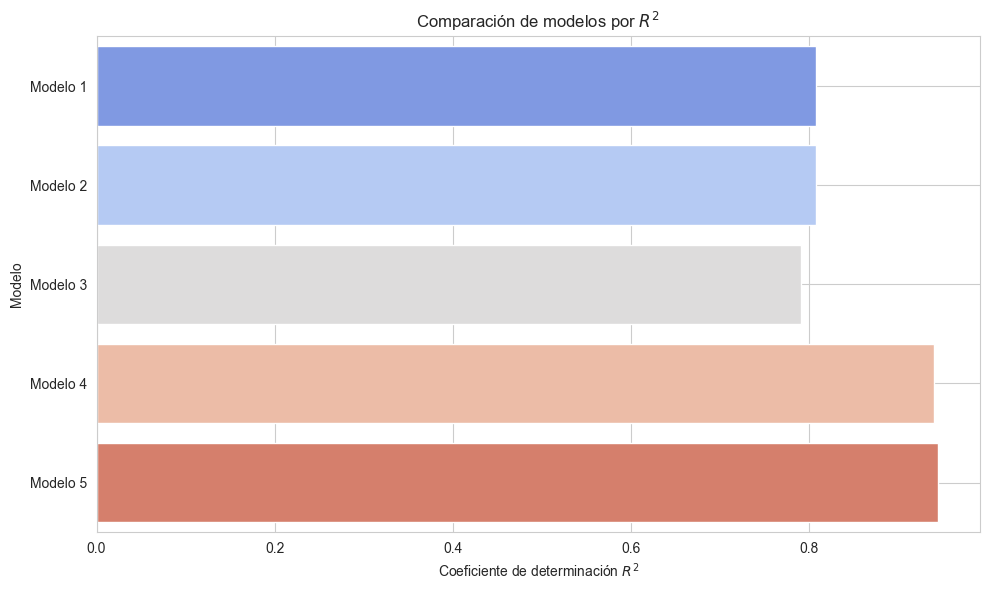

In [158]:
# Crea un gráfico de barras para comparar visualmente el desempeño de distintos modelos según su R²
plt.figure(figsize=(10, 6))
sns.barplot(x='R2', y='Modelo', data=df_resultados, palette='coolwarm')
plt.xlabel('Coeficiente de determinación $R^2$')
plt.ylabel('Modelo')
plt.title('Comparación de modelos por $R^2$')
plt.grid(True)
plt.tight_layout()
plt.show()


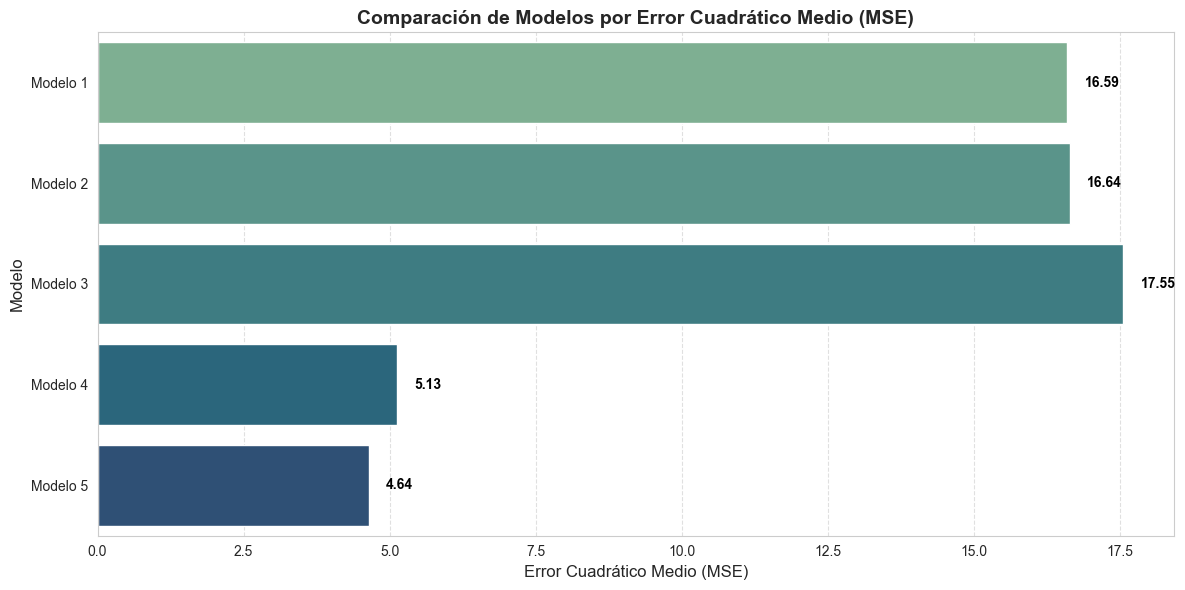

In [159]:
# EStilos y colores
plt.figure(figsize=(12, 6))
barplot = sns.barplot(
    data=df_resultados,
    y='Modelo',
    x='MSE',
    palette='crest'  
)

# Título y etiquetas
plt.title('Comparación de Modelos por Error Cuadrático Medio (MSE)', fontsize=14, weight='bold')
plt.xlabel('Error Cuadrático Medio (MSE)', fontsize=12)
plt.ylabel('Modelo', fontsize=12)

# Mostrar los valores al final de cada barra
for index, value in enumerate(df_resultados['MSE']):
    plt.text(value + 0.3, index, f'{value:.2f}', color='black', va='center', fontweight='bold')

# Ajustes
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## 4. Selección del mejor modelo

<div style="text-align:justify; line-height: 1.9; ">

Con base en los resultados obtenidos y reflejados en las gráficas de comparación, se selecciona el Modelo 5 como el modelo óptimo para predecir la esperanza de vida. Este modelo presenta el mayor coeficiente de determinación con un valor de $R^2 = 0.9447$, lo que significa que explica aproximadamente el 94.47% de la variabilidad de la variable dependiente. Además, registra el menor error cuadrático medio (MSE) con un valor de 4.64, lo cual indica una excelente precisión en sus predicciones. 

</div>

<div style="text-align:justify; line-height: 1.9; ">

### 4.1 Variables utilizadas en el mejor modelo

A continuación se listan las variables utilizadas:

#### Variables incluidas:
- Schooling
- Adult Mortality
- Status_Developing
- Total expenditure
- Income composition of resources
- percentage expenditure
- HIV/AIDS
- Measles
- under-five deaths
- Year
- thinness 10-19 years
- Polio

#### Variables categóricas codificadas (por país):
- Country_Albania
- Country_Algeria
- Country_Angola
- Country_Antigua and Barbuda
- Country_Argentina
- Country_Armenia
- ...

---

### Variables no incluidas

Algunas variables presentes en el conjunto original fueron descartadas por su baja correlación o por no aportar valor predictivo significativo. Por ejemplo, la variable Population no fue incluida ya que **no mostró una correlación importante con la esperanza de vida** y no mejoró el desempeño del modelo en pruebas preliminares.

#### Variables excluidas:
- Population
- infant deaths
- Alcohol
- Hepatitis B
- BMI
- GDP
- Diphtheria
- thinness 5-9 years

</div>


R²: 0.9447
MSE: 4.6410
      Valor real  Predicción
1793        65.9   66.328828
270         68.2   68.601491
213         74.7   73.330842
2337        87.0   78.956595
678         79.3   79.969887
1664        74.6   74.334454
712         68.5   68.426059
2118        73.1   74.770288
2882        65.4   65.056974
1737        73.8   75.028021


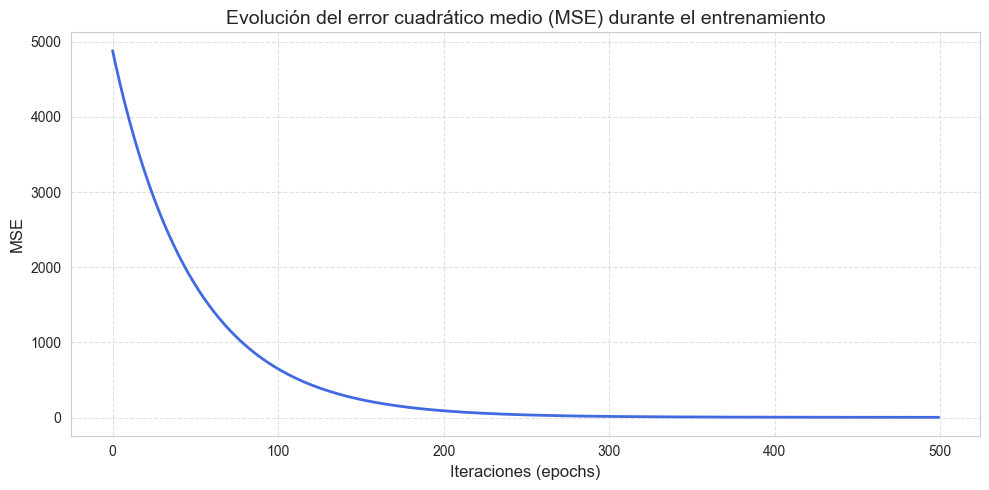

In [160]:
# Filtrar columnas que empiezan con 'Country_'
country_cols = [col for col in df.columns if col.startswith('Country_')]

# Lista de variables base (puedes ajustar según lo que uses)
base_features = ['Schooling', 'Adult Mortality', 'Status_Developing',
                  'Total expenditure', 'Income composition of resources',
                 'percentage expenditure', 'HIV/AIDS','Measles','under-five deaths','Year','thinness 10-19 years','Polio']

# Unir base + columnas de país
selected_features = base_features + country_cols

# Seleccionar variables predictoras y target
X = df[selected_features]
y = df['Life expectancy']

#Dividir el entrenamiento y las pruebas 80% train 20% test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=40)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = MultipleLinearRegressionGradientDescent(n_iterations=500, learning_rate=0.01)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)


r2 = r2_score(y_test,y_pred)
print(f'R²: {r2:.4f}')

mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse:.4f}')

print(resultados.head(10)) 

plt.figure(figsize=(10, 5))
plt.plot(range(len(model.errors)), model.errors, color='royalblue', linewidth=2)
plt.title('Evolución del error cuadrático medio (MSE) durante el entrenamiento', fontsize=14)
plt.xlabel('Iteraciones (epochs)', fontsize=12)
plt.ylabel('MSE', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

<div style="text-align:justify; line-height: 1.9; ">

### 4.2 Análisis de la evolución del error con tasa de aprendizaje baja

En la siguiente figura se observa la evolución del error cuadrático medio (MSE) durante el entrenamiento del modelo utilizando una tasa de aprendizaje de **0.001** y **500 iteraciones**. Se aprecia una **disminución constante pero lenta**.

Este comportamiento es característico de tasas de aprendizaje bajas: el descenso de gradiente es **estable**, pero **demasiado lento**, por lo que el modelo requiere muchas más iteraciones para acercarse al mínimo de la función de pérdida. Aunque se evita el riesgo de divergencia, el modelo puede no estar completamente ajustado al finalizar las 500 iteraciones, lo que limita su capacidad predictiva.

Este resultado sugiere que una tasa de aprendizaje ligeramente mayor (por ejemplo, 0.01) podría permitir alcanzar una buena convergencia en menos tiempo, sin comprometer la estabilidad.

</div>

R²: -20.0529
MSE: 1767.1053


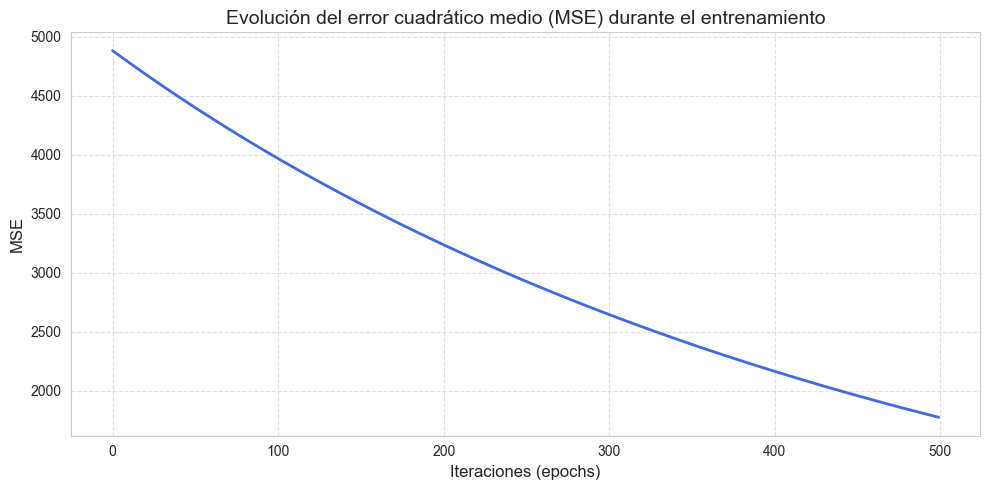

In [161]:
# Entrena un nuevo modelo de regresión lineal múltiple con una tasa de aprendizaje más baja
model = MultipleLinearRegressionGradientDescent(n_iterations=500, learning_rate=0.001)
model.fit(X_train_scaled, y_train)

# Genera predicciones con los datos de prueba
y_pred = model.predict(X_test_scaled)

# Calcula y muestra las métricas de desempeño del modelo
r2 = r2_score(y_test,y_pred)
print(f'R²: {r2:.4f}')

mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse:.4f}')

# Grafica la evolución del error cuadrático medio (MSE) durante el proceso de entrenamiento
plt.figure(figsize=(10, 5))
plt.plot(range(len(model.errors)), model.errors, color='royalblue', linewidth=2)
plt.title('Evolución del error cuadrático medio (MSE) durante el entrenamiento', fontsize=14)
plt.xlabel('Iteraciones (epochs)', fontsize=12)
plt.ylabel('MSE', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

<div style="text-align:justify; line-height: 1.9; ">

### 4.3 Análisis de la evolución del error con tasa de aprendizaje alta

En esta ejecución, se utilizó una tasa de aprendizaje de **0.1** con **500 iteraciones**. La gráfica resultante muestra una **disminución abrupta del error cuadrático medio (MSE)** en las primeras iteraciones, alcanzando rápidamente una zona de convergencia estable. A diferencia del comportamiento observado con una tasa más baja, aquí el modelo logra minimizar el error en muy pocas iteraciones.

Este resultado demuestra que una tasa de aprendizaje mayor puede ser altamente efectiva si se mantiene dentro de un rango que no provoque divergencia. En este caso, la elección de $\eta = 0.1$ permitió que el modelo alcanzara un **$R^2$ de 0.9548** y un **MSE de 3.7968**, superando a los modelos entrenados con tasas más pequeñas.

La curva plana a partir de la iteración ~100 indica que continuar entrenando más allá de ese punto ya no aporta mejoras significativas, lo que sugiere que se podría reducir el número de iteraciones sin perder rendimiento.

</div>


R²: 0.9548
MSE: 3.7968


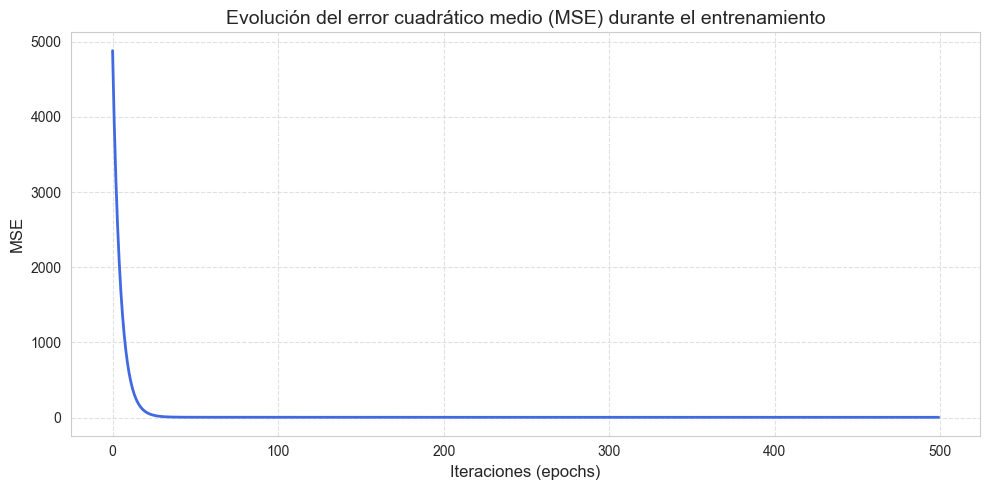

In [162]:
# Entrena un modelo de regresión lineal múltiple con una tasa de aprendizaje alta (0.1)
model = MultipleLinearRegressionGradientDescent(n_iterations=500, learning_rate=0.1)
model.fit(X_train_scaled, y_train)

# Realiza predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test_scaled)

# Calcula y muestra el coeficiente de determinación R² del modelo
r2 = r2_score(y_test,y_pred)
print(f'R²: {r2:.4f}')

# Calcula y muestra el error cuadrático medio (MSE) del modelo
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse:.4f}')

# Grafica la evolución del error durante el entrenamiento
plt.figure(figsize=(10, 5))
plt.plot(range(len(model.errors)), model.errors, color='royalblue', linewidth=2)
plt.title('Evolución del error cuadrático medio (MSE) durante el entrenamiento', fontsize=14)
plt.xlabel('Iteraciones (epochs)', fontsize=12)
plt.ylabel('MSE', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

<div style="text-align:justify; line-height: 1.9; ">

### 4.4 Comparación de tasas de aprendizaje

En la siguiente figura se comparan tres modelos entrenados con tasas de aprendizaje distintas: $\eta = 0.001$, $\eta = 0.01$ y $\eta = 0.1$. Cada curva representa la evolución del error cuadrático medio (MSE) a lo largo de 500 iteraciones.

Se observan los siguientes comportamientos:

- Con **$\eta = 0.001$**, el modelo converge lentamente. El error disminuye de forma progresiva pero no alcanza un mínimo bajo dentro del número de iteraciones definido.
- Con **$\eta = 0.01$**, el modelo presenta una **rápida convergencia** y alcanza un MSE bajo de manera estable sin oscilaciones.
- Con **$\eta = 0.1$**, el modelo alcanza el mínimo en muy pocas iteraciones, mostrando una **convergencia ultrarrápida**.

</div>


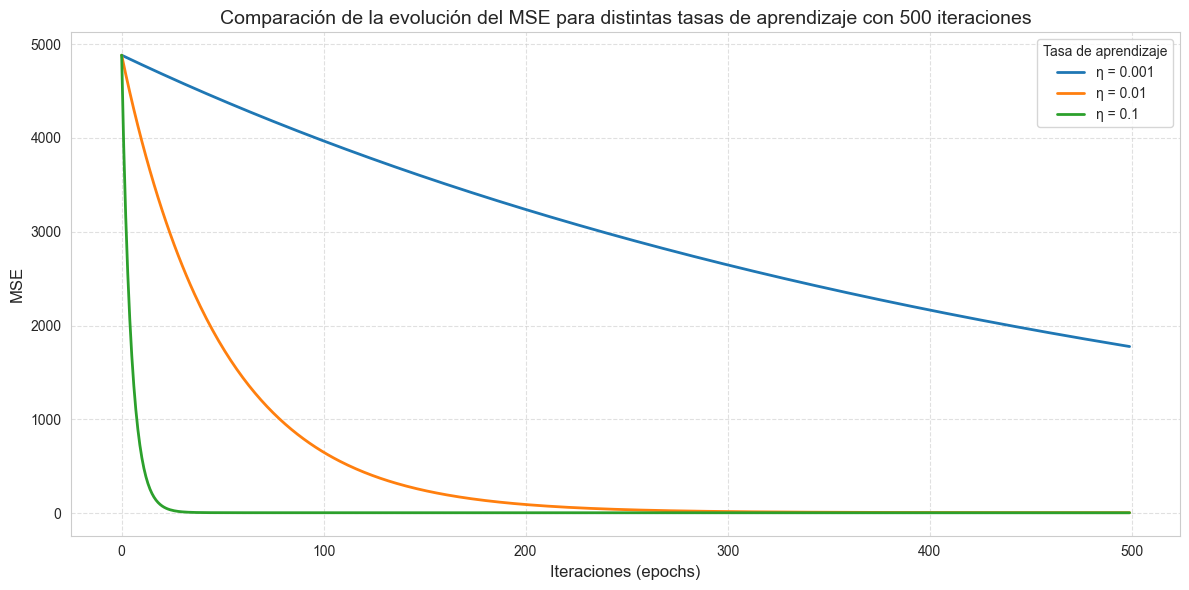

In [163]:
# Compara la evolución del error (MSE) durante el entrenamiento para diferentes tasas de aprendizaje
learning_rates = [0.001, 0.01, 0.1]
errores_por_lr = {}

# Entrena un modelo para cada tasa de aprendizaje y guarda el historial de errores
for lr in learning_rates:
    modelo = MultipleLinearRegressionGradientDescent(n_iterations=500, learning_rate=lr)
    modelo.fit(X_train_scaled, y_train)
    errores_por_lr[lr] = modelo.errors

# Grafica la evolución del MSE para cada tasa de aprendizaje
plt.figure(figsize=(12, 6))

for lr, errores in errores_por_lr.items():
    plt.plot(range(len(errores)), errores, label=f'η = {lr}', linewidth=2)

plt.title('Comparación de la evolución del MSE para distintas tasas de aprendizaje con 500 iteraciones', fontsize=14)
plt.xlabel('Iteraciones (epochs)', fontsize=12)
plt.ylabel('MSE', fontsize=12)
plt.legend(title='Tasa de aprendizaje')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


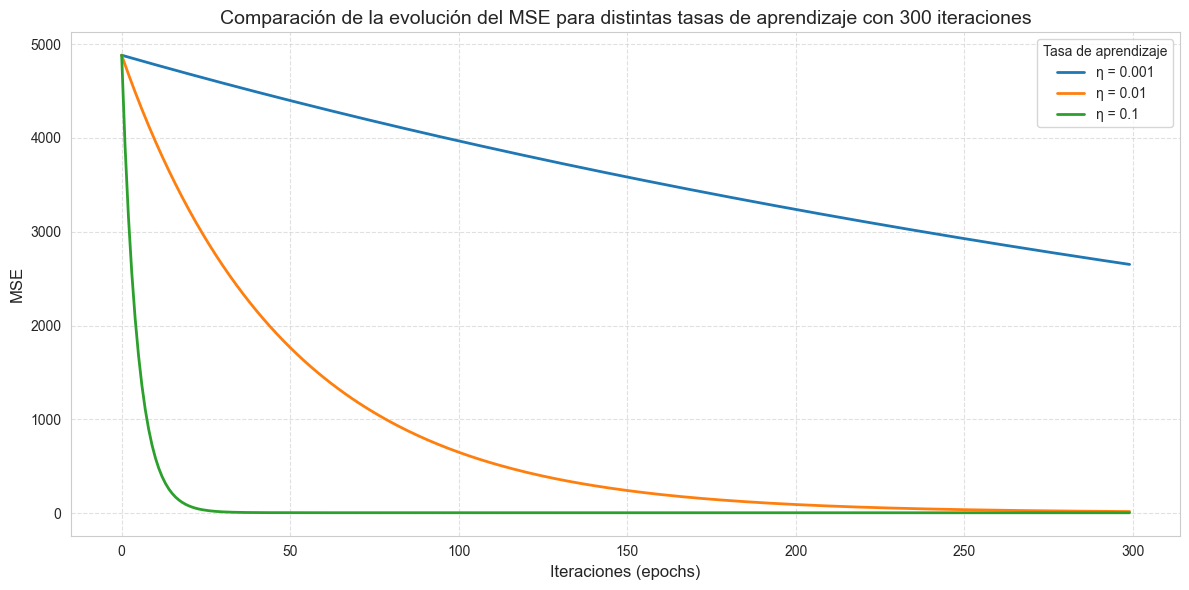

In [164]:
# Compara cómo evoluciona el error (MSE) durante el entrenamiento para distintas tasas de aprendizaje (η)
learning_rates = [0.001, 0.01, 0.1]
errores_por_lr = {}

# Entrena un modelo con cada tasa de aprendizaje y almacena el historial de errores por iteración
for lr in learning_rates:
    modelo = MultipleLinearRegressionGradientDescent(n_iterations=300, learning_rate=lr)
    modelo.fit(X_train_scaled, y_train)
    errores_por_lr[lr] = modelo.errors

# Grafica la evolución del MSE para cada una de las tasas de aprendizaje
plt.figure(figsize=(12, 6))

for lr, errores in errores_por_lr.items():
    plt.plot(range(len(errores)), errores, label=f'η = {lr}', linewidth=2)

plt.title('Comparación de la evolución del MSE para distintas tasas de aprendizaje con 300 iteraciones', fontsize=14)
plt.xlabel('Iteraciones (epochs)', fontsize=12)
plt.ylabel('MSE', fontsize=12)
plt.legend(title='Tasa de aprendizaje')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

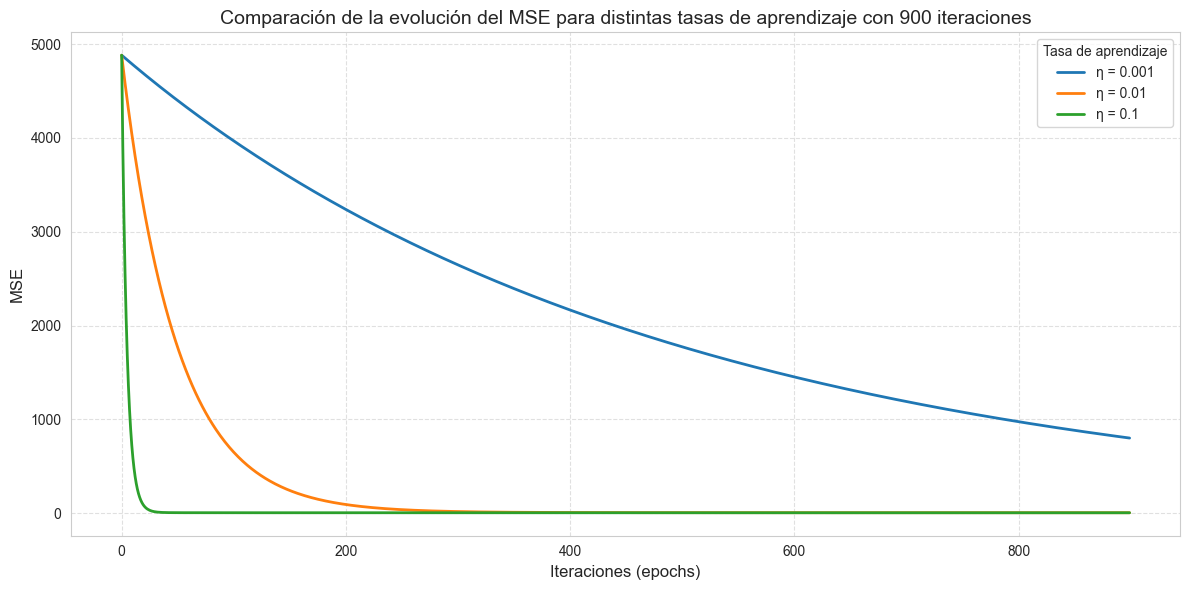

In [165]:
# Compara cómo evoluciona el error (MSE) durante el entrenamiento para distintas tasas de aprendizaje (η)
learning_rates = [0.001, 0.01, 0.1]
errores_por_lr = {}

# Entrena un modelo con cada tasa de aprendizaje y almacena el historial de errores por iteración
for lr in learning_rates:
    modelo = MultipleLinearRegressionGradientDescent(n_iterations=900, learning_rate=lr)
    modelo.fit(X_train_scaled, y_train)
    errores_por_lr[lr] = modelo.errors

# Grafica la evolución del MSE para cada una de las tasas de aprendizaje
plt.figure(figsize=(12, 6))

for lr, errores in errores_por_lr.items():
    plt.plot(range(len(errores)), errores, label=f'η = {lr}', linewidth=2)

plt.title('Comparación de la evolución del MSE para distintas tasas de aprendizaje con 900 iteraciones', fontsize=14)
plt.xlabel('Iteraciones (epochs)', fontsize=12)
plt.ylabel('MSE', fontsize=12)
plt.legend(title='Tasa de aprendizaje')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

<div style="text-align:justify; line-height: 1.9; ">

## 5. Justificación de la selección final del modelo

Aunque el modelo entrenado con una tasa de aprendizaje de **0.1** alcanzó el **mayor $R^2$ (0.9548)** y el **menor MSE (3.7968)**, se ha optado por seleccionar como modelo final aquel entrenado con una **tasa de aprendizaje de 0.01** y **500 iteraciones**, que obtuvo un **$R^2$ de 0.9447** y un **MSE de 4.6410**.

Justificación:

La diferencia en el coeficiente de determinación entre ambos modelos es **menor al 1.1%**, lo cual **no representa una mejora sustancial** en la práctica. Por tanto, no justifica asumir el riesgo que implica una tasa de aprendizaje mayor. El modelo con $\eta = 0.01$ mostró una **curva de MSE suave y progresiva**, sin oscilaciones bruscas ni signos de sobreajuste. Esto indica una **convergencia estable**.

**Menor riesgo de sobreajuste**
Modelos entrenados con $\eta = 0.1$ pueden converger demasiado rápido y **ajustarse en exceso al conjunto de entrenamiento**, lo que reduce su capacidad de generalizar. En cambio, $\eta = 0.01$ mantiene un **buen equilibrio entre precisión y robustez** ante nuevos datos. Una tasa de aprendizaje moderada como 0.01 permite entrenar el modelo de forma **más controlada y reproducible**, facilitando su reutilización, explicación y mantenimiento en contextos aplicados.


#### Justificación del número de iteraciones: 500

El número de **500 iteraciones** fue seleccionado como un **valor intermedio óptimo**, que:

- Garantiza que el modelo tenga **suficientes oportunidades para minimizar el error**.
- Evita **costos computacionales innecesarios** como los que se observarían con más de 1000 iteraciones sin mejora significativa.
- En el gráfico de MSE se observa que la curva comienza a estabilizarse entre las iteraciones 300–400, por lo que continuar hasta 500 garantiza que el modelo **alcanza una zona de mínimo** sin desperdicio de recursos.


### Conclusión

Se selecciona como modelo final aquel entrenado con:

- **Tasa de aprendizaje ($\eta$): 0.01**
- **Número de iteraciones: 500**
- **Resultados obtenidos:**
  - $R^2 = 0.9447$
  - MSE = 4.6410

  </div>


In [ ]:

# Guardado de modelo de regresión lineal y recursos asociados

import os
import joblib

joblib.dump(model5, "linear_model.pkl")
joblib.dump(scaler, "scaler_linear.pkl")
feature_order = X.columns.tolist()
joblib.dump(feature_order, "feature_order.pkl")

['feature_order.pkl']